# **Final Project**

**Presenters:**

Topaz Aakal, 318644549

Afik Danan, 208900175

Tal Haimovich, 205623630

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Help Functions

In [2]:
DegreeCentralitydict_MainCharacter = {}
BetweennessCentralitydict_MainCharacter = {}
ClosnessCentralitydict_MainCharacter = {}


DegreeCentralitydict_StarkVSLannister = {}
BetweennessCentralitydict_StarkVSLannister = {}
ClosnessCentralitydict_StarkVSLannister = {}

DegreeCentralitydict_WarOfKings = {}
BetweennessCentralitydict_WarOfKings = {}
ClosnessCentralitydict_WarOfKings = {}


In [118]:
def plot_degree_histograms(degree_counts):
    fig, axs = plt.subplots(2,2 , figsize=(15, 10))  #
    axs = axs.flatten()

    for i, (title, degree_count) in enumerate(degree_counts.items()):
        degrees = list(degree_count.keys())
        frequencies = list(degree_count.values())

        ax = axs[i]  # Select the current subplot
        ax.bar(degrees, frequencies, width=0.8, color='b', alpha=0.7)
        ax.set_title(title)
        ax.set_xlabel('Degree')
        ax.set_ylabel('Quantity')

    plt.tight_layout()
    plt.show()



In [4]:
def addToDict(name, bookNumber, data ):
  if name in data:
     return {bookNumber: data[name]}
  else:
     return {bookNumber: None}


def updateCentralityDict(name, bookNumber, dictToUpdate, data ):
  if name not in dictToUpdate.keys():
    dictToUpdate[name] = addToDict(name, bookNumber, data )
  else:
    dictToUpdate[name].update(addToDict(name, bookNumber, data ))



In [5]:
def plotCompareByCharacter(data, title, y_label):
  x = [1,2,3,4]
  plt.figure(figsize=(10, 6))

  for name in data.keys():
    plt.plot(data[name].keys(),data[name].values(),label=name)

  plt.xlabel('Book Number')
  plt.ylabel(f'{y_label}')
  plt.title(f"{title}")
  plt.legend(loc="upper right")
  plt.xticks(x)
  plt.show()


In [6]:
def plotCentralityByCharacter(data, name, centralityType):
  x = list(data.keys())  # x-axis values
  y = list(data.values())  # y-axis values

  plt.plot(x, y, 'bo-')
  plt.xlabel('Book Number')
  plt.ylabel(f'{centralityType} Centrality')  # label the y-axis
  plt.title(f"{name} {centralityType} Centrality throughout book series")
  plt.xticks(x)
  plt.show()


In [7]:
def drawCentralityGraph(filtered_G, measure, name, top_measure_list, k, iterations ):
    # Parameters for visualization
    max_font_size = 9  # Maximum font size for the top nodes
    default_font_size = 5  # Font size for the rest of the nodes

    # Find the max and min measure centrality to normalize the values
    max_measure = max(measure.values())
    min_measure = min(measure.values())
    measure_range = max_measure - min_measure

    # Scale measure for node size
    regular_node_size = 100  # Node size for regular nodes
    top_node_size = 400  # Node size for top nodes

    # Extract top node labels
    top_nodes = [node for node, _ in top_measure_list[:10]]

    # Scale node sizes
    scaled_node_sizes = {
      node: top_node_size if node in top_nodes else regular_node_size
      for node in filtered_G.nodes()
    }
   # Scale font size
    scaled_measure_for_font = {
      node: max_font_size if node in top_nodes else default_font_size
      for node in filtered_G.nodes()
    }

    # Get the top 10 nodes
    top_10_nodes = set(node for node, measure in top_measure_list[:10])

    # Visualize the Network
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(filtered_G, k=k, iterations=iterations)

    # Draw all nodes with the default color (skyblue)
    nx.draw_networkx_nodes(filtered_G, pos, node_size=[scaled_node_sizes[node] for node in filtered_G.nodes()],  node_color='skyblue')

    # Draw the top ten nodes with a different color (red)
    nx.draw_networkx_nodes(filtered_G, pos, nodelist=top_10_nodes,
                           node_size=[scaled_node_sizes[node] for node in top_10_nodes],
                           node_color='red')

    # Draw edges
    nx.draw_networkx_edges(filtered_G, pos)

    # Draw labels with adjusted font sizes
    for node, (x, y) in pos.items():
      plt.text(x, y, s=node,
        horizontalalignment='center', fontweight='regular',
               fontsize=scaled_measure_for_font[node], color='black')

    plt.title(f'Network Visualization {name} Centrality')
    plt.axis('off')
    plt.show()

def calculateTopCentrality(measure, name,number):
  # Sort and print the top 10 nodes with highest selected measure centrality
  measure_list = sorted(measure.items(), key=lambda item: item[1], reverse=True)
  print(f"\nTop {number} nodes with highest {name} centrality:")
  for node, score in measure_list[:number]:
    print(f"{node}: {score :.4f}")

  return measure_list


def centralityGraph(filtered_G, measure, name,k ,iterations):
  top_measure_list = calculateTopCentrality(measure, name, 10)
  drawCentralityGraph(filtered_G, measure, name, top_measure_list, k, iterations)
  return top_measure_list




In [8]:
def createGraph(nodes,edges, weightToFilter):
  G = nx.Graph()

  G.add_nodes_from(nodes)
  # df_edges_weightAbove10 = df_edges[df_edges['weight'] >=1]
  # G = nx.from_pandas_edgelist(df_edges, source='Source', target='Target', edge_attr=None, create_using=None, edge_key=None)

  G.add_weighted_edges_from(edges[['Source', 'Target', 'weight']].values.tolist())
  filtered_edges = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] >= weightToFilter]

  # Create a new graph with filtered edges
  filtered_G = G.edge_subgraph(filtered_edges)
  return G, filtered_G

def drawGraph(G, k , iterations):
  # Draw the filtered graph
  plt.figure(figsize=(12,8))
  pos = nx.spring_layout(G, k=k, iterations=iterations)
  nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', edge_color='gray', width=0.5, font_size=9)
  plt.show()


In [120]:
def plotDegreeDistribution(G):
  # Compute and visualize the degree distribution of the network
  degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
  # Create a dictionary with degree as key and frequency as value
  degreeCount = {}
  for item in degree_sequence:
      if item not in degreeCount:
          degreeCount[item] = 1
      else:
          degreeCount[item] += 1

  # Plot the degree distribution as a bar chart
  plt.bar(list(degreeCount.keys()), list(degreeCount.values()), width=0.80, color='skyblue')
  plt.title("Degree Distribution")
  plt.ylabel("Quantity")
  plt.xlabel("Degree")
  plt.show()
  return degreeCount


In [10]:
def drawCommunities(G, communities, k, iterations):
    num_communities = len(communities)
    colors = plt.cm.tab20(np.linspace(0, 1, num_communities))

    node_color_map = {}
    for i, community in enumerate(communities):
        for node in community:
            node_color_map[node] = colors[i]

    node_color = [node_color_map[node] for node in G.nodes()]

    plt.figure(figsize=(16, 12))
    pos = nx.spring_layout(G, k=k, iterations=iterations)
    nx.draw(G, pos=pos, node_color=node_color, with_labels=True, font_size=8)
    plt.show()

## Book 1


In [109]:
df_edges = pd.read_csv('/content/asoiaf-book1-edges.csv')
df_nodes = pd.read_csv('/content/asoiaf-book1-nodes.csv')


### Preprocess

In [110]:
df_edges = df_edges.dropna()
df_nodes = df_nodes.dropna()


### First Look

In [111]:
G, filtered_G = createGraph(df_nodes,df_edges,7)
G.remove_node('Id')
G.remove_node('Label')


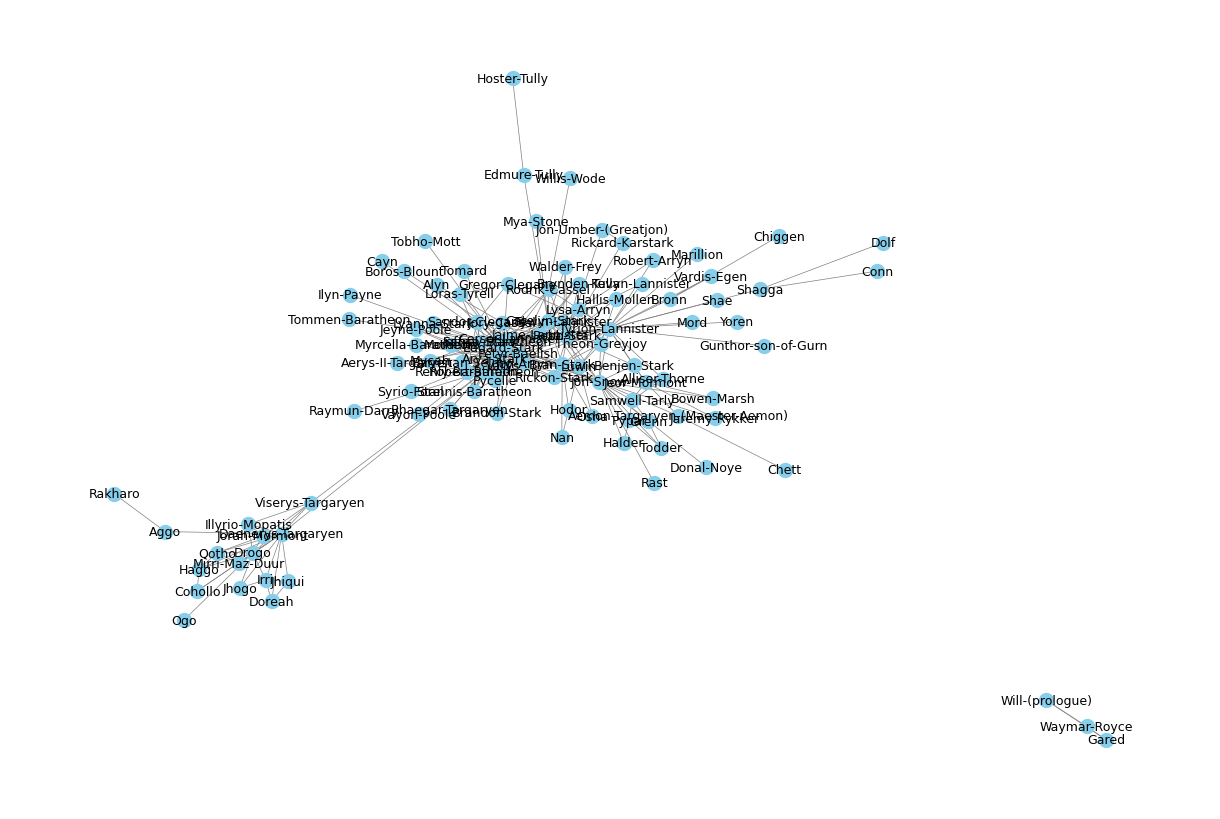

In [112]:
drawGraph(filtered_G, 0.85, 150)

### Degree Distribution


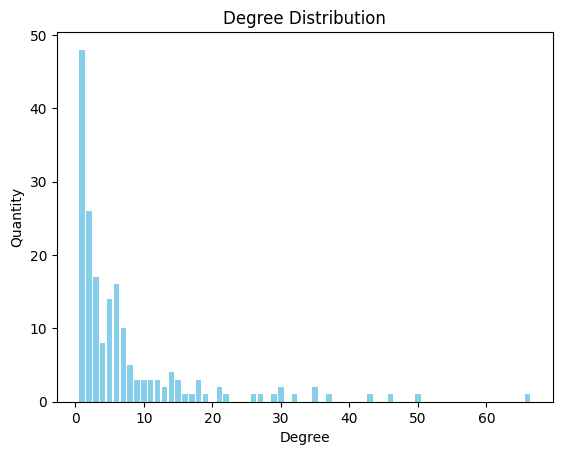

In [121]:
degreeCount1 = plotDegreeDistribution(G)


There are a lot of side characters that have 1 interaction throughout the book, and a few main characters that have many interactions throughout the book, we can see a power law distribution as expected

### Centrality


#### Betweenness



Top 10 nodes with highest betweenness centrality:
Eddard-Stark: 0.2696
Robert-Baratheon: 0.2140
Tyrion-Lannister: 0.1902
Jon-Snow: 0.1716
Catelyn-Stark: 0.1514
Daenerys-Targaryen: 0.0863
Robb-Stark: 0.0730
Drogo: 0.0648
Bran-Stark: 0.0558
Sansa-Stark: 0.0371


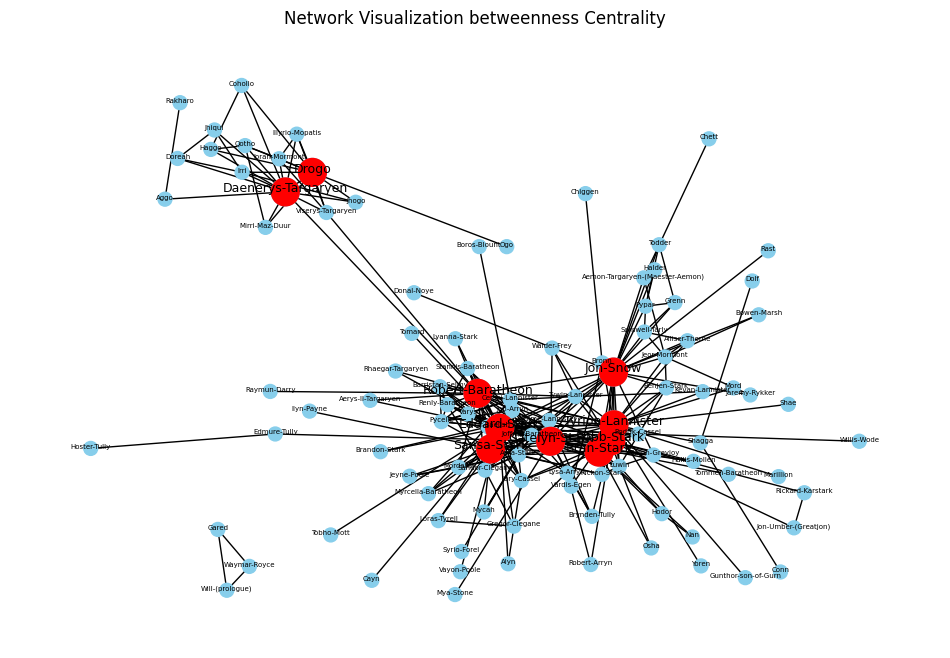

In [16]:
# Calculate Betweenness Centrality
betweenness = nx.betweenness_centrality(G)
betweenness_Book1 = centralityGraph(filtered_G, betweenness, "betweenness",0.95,70)

updateCentralityDict('Jon-Snow', 1, BetweennessCentralitydict_MainCharacter, betweenness)
updateCentralityDict('Tyrion-Lannister', 1, BetweennessCentralitydict_MainCharacter, betweenness)
updateCentralityDict('Daenerys-Targaryen', 1, BetweennessCentralitydict_MainCharacter, betweenness)
updateCentralityDict('Eddard-Stark', 1, BetweennessCentralitydict_MainCharacter, betweenness)
updateCentralityDict('Cersei-Lannister', 1, BetweennessCentralitydict_MainCharacter, betweenness)

updateCentralityDict('Robb-Stark', 1, BetweennessCentralitydict_StarkVSLannister, betweenness)
updateCentralityDict('Sansa-Stark', 1, BetweennessCentralitydict_StarkVSLannister, betweenness)
updateCentralityDict('Catelyn-Stark', 1, BetweennessCentralitydict_StarkVSLannister, betweenness)
updateCentralityDict('Cersei-Lannister', 1, BetweennessCentralitydict_StarkVSLannister, betweenness)
updateCentralityDict('Jaime-Lannister', 1, BetweennessCentralitydict_StarkVSLannister, betweenness)
updateCentralityDict('Tyrion-Lannister', 1, BetweennessCentralitydict_StarkVSLannister, betweenness)


updateCentralityDict('Robb-Stark', 1, BetweennessCentralitydict_WarOfKings, betweenness)
updateCentralityDict('Joffrey-Baratheon', 1, BetweennessCentralitydict_WarOfKings, betweenness)
updateCentralityDict('Stannis-Baratheon', 1, BetweennessCentralitydict_WarOfKings, betweenness)
updateCentralityDict('Renly-Baratheon', 1, BetweennessCentralitydict_WarOfKings, betweenness)


#### Degree


Top 10 nodes with highest Degree centrality:
Eddard-Stark: 0.3548
Robert-Baratheon: 0.2688
Tyrion-Lannister: 0.2473
Catelyn-Stark: 0.2312
Jon-Snow: 0.1989
Robb-Stark: 0.1882
Sansa-Stark: 0.1882
Bran-Stark: 0.1720
Cersei-Lannister: 0.1613
Joffrey-Baratheon: 0.1613


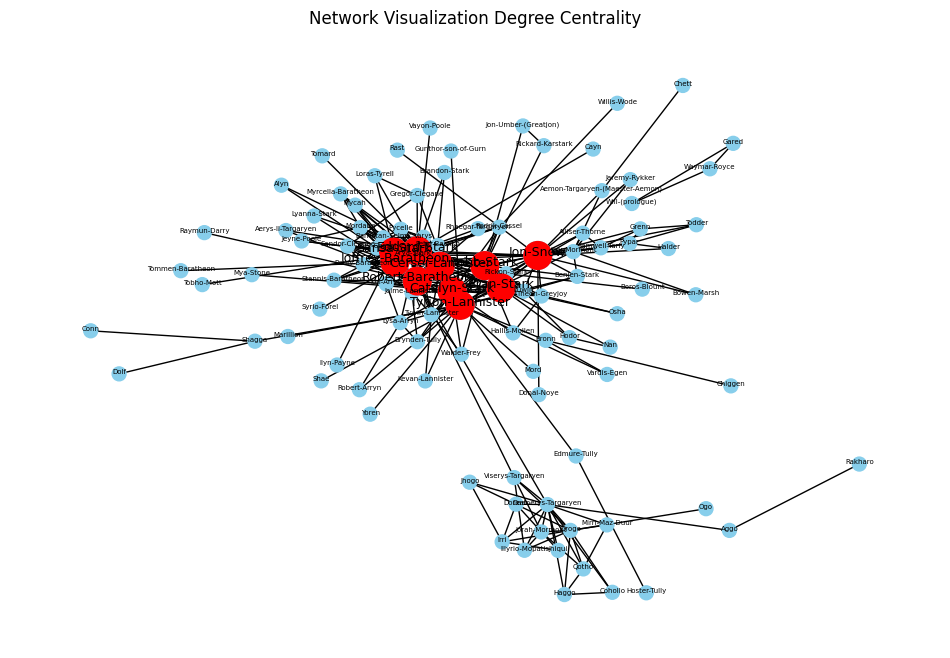

In [17]:
ds = nx.degree_centrality(G)
degree_Book1 = centralityGraph(filtered_G, ds, "Degree", 0.95, 70)


updateCentralityDict('Jon-Snow', 1, DegreeCentralitydict_MainCharacter, ds)
updateCentralityDict('Tyrion-Lannister', 1, DegreeCentralitydict_MainCharacter, ds)
updateCentralityDict('Daenerys-Targaryen', 1, DegreeCentralitydict_MainCharacter, ds)
updateCentralityDict('Eddard-Stark', 1, DegreeCentralitydict_MainCharacter, ds)
updateCentralityDict('Cersei-Lannister', 1, DegreeCentralitydict_MainCharacter, ds)


updateCentralityDict('Robb-Stark', 1, DegreeCentralitydict_StarkVSLannister, ds)
updateCentralityDict('Sansa-Stark', 1, DegreeCentralitydict_StarkVSLannister, ds)
updateCentralityDict('Catelyn-Stark', 1, DegreeCentralitydict_StarkVSLannister, ds)
updateCentralityDict('Cersei-Lannister', 1, DegreeCentralitydict_StarkVSLannister, ds)
updateCentralityDict('Jaime-Lannister', 1, DegreeCentralitydict_StarkVSLannister, ds)
updateCentralityDict('Tyrion-Lannister', 1, DegreeCentralitydict_StarkVSLannister, ds)


updateCentralityDict('Robb-Stark', 1, DegreeCentralitydict_WarOfKings, ds)
updateCentralityDict('Joffrey-Baratheon', 1, DegreeCentralitydict_WarOfKings, ds)
updateCentralityDict('Stannis-Baratheon', 1, DegreeCentralitydict_WarOfKings, ds)
updateCentralityDict('Renly-Baratheon', 1, DegreeCentralitydict_WarOfKings, ds)



#### Closeness


Top 10 nodes with highest Closeness centrality:
Eddard-Stark: 0.5636
Robert-Baratheon: 0.5455
Tyrion-Lannister: 0.5110
Catelyn-Stark: 0.5054
Robb-Stark: 0.4973
Jon-Snow: 0.4934
Sansa-Stark: 0.4895
Bran-Stark: 0.4869
Cersei-Lannister: 0.4844
Joffrey-Baratheon: 0.4806


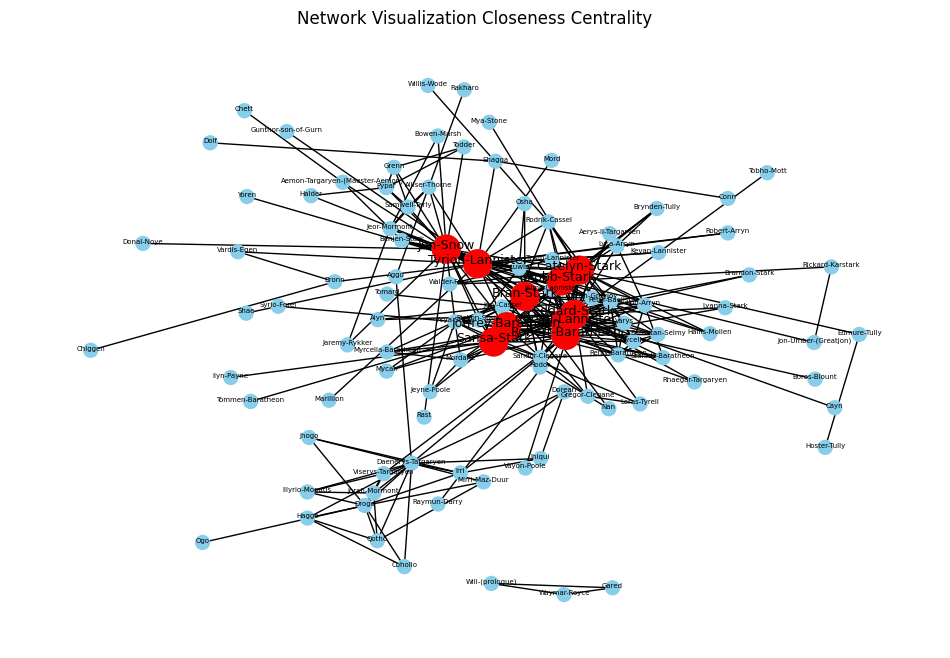

In [18]:
closeness = nx.closeness_centrality(G)
closeness_Book1= centralityGraph(filtered_G, closeness, "Closeness", 1.6, 90)

updateCentralityDict('Jon-Snow', 1, ClosnessCentralitydict_MainCharacter, closeness)
updateCentralityDict('Tyrion-Lannister', 1, ClosnessCentralitydict_MainCharacter, closeness)
updateCentralityDict('Daenerys-Targaryen', 1, ClosnessCentralitydict_MainCharacter, closeness)
updateCentralityDict('Eddard-Stark', 1, ClosnessCentralitydict_MainCharacter, closeness)
updateCentralityDict('Cersei-Lannister', 1, ClosnessCentralitydict_MainCharacter, closeness)

updateCentralityDict('Robb-Stark', 1, ClosnessCentralitydict_StarkVSLannister, closeness)
updateCentralityDict('Sansa-Stark', 1, ClosnessCentralitydict_StarkVSLannister, closeness)
updateCentralityDict('Catelyn-Stark', 1, ClosnessCentralitydict_StarkVSLannister, closeness)
updateCentralityDict('Cersei-Lannister', 1, ClosnessCentralitydict_StarkVSLannister, closeness)
updateCentralityDict('Jaime-Lannister', 1, ClosnessCentralitydict_StarkVSLannister, closeness)
updateCentralityDict('Tyrion-Lannister', 1, ClosnessCentralitydict_StarkVSLannister, closeness)

updateCentralityDict('Robb-Stark', 1, ClosnessCentralitydict_WarOfKings, closeness)
updateCentralityDict('Joffrey-Baratheon', 1, ClosnessCentralitydict_WarOfKings, closeness)
updateCentralityDict('Stannis-Baratheon', 1, ClosnessCentralitydict_WarOfKings, closeness)
updateCentralityDict('Renly-Baratheon', 1, ClosnessCentralitydict_WarOfKings, closeness)


### Communities

In [19]:
communities_generator = nx.community.louvain_communities(filtered_G)

for i, community in enumerate(communities_generator):
  print(f"Community {i + 1}: {list(community)}")


Community 1: ['Stannis-Baratheon', 'Tomard', 'Renly-Baratheon', 'Tobho-Mott', 'Vayon-Poole', 'Robert-Baratheon', 'Jon-Arryn', 'Cersei-Lannister', 'Eddard-Stark', 'Raymun-Darry', 'Alyn', 'Pycelle', 'Boros-Blount', 'Varys', 'Brandon-Stark', 'Jory-Cassel', 'Barristan-Selmy', 'Rhaegar-Targaryen', 'Aerys-II-Targaryen', 'Cayn', 'Petyr-Baelish', 'Lyanna-Stark']
Community 2: ['Jeor-Mormont', 'Donal-Noye', 'Chett', 'Rast', 'Jaremy-Rykker', 'Aemon-Targaryen-(Maester-Aemon)', 'Todder', 'Grenn', 'Halder', 'Pypar', 'Benjen-Stark', 'Jon-Snow', 'Samwell-Tarly', 'Alliser-Thorne', 'Bowen-Marsh']
Community 3: ['Jorah-Mormont', 'Illyrio-Mopatis', 'Viserys-Targaryen', 'Daenerys-Targaryen', 'Drogo', 'Aggo', 'Mirri-Maz-Duur', 'Ogo', 'Rakharo', 'Jhogo', 'Haggo', 'Cohollo', 'Irri', 'Qotho', 'Doreah', 'Jhiqui']
Community 4: ['Conn', 'Vardis-Egen', 'Willis-Wode', 'Bronn', 'Rodrik-Cassel', 'Yoren', 'Shagga', 'Tyrion-Lannister', 'Mya-Stone', 'Walder-Frey', 'Lysa-Arryn', 'Tywin-Lannister', 'Dolf', 'Edmure-Tully', 

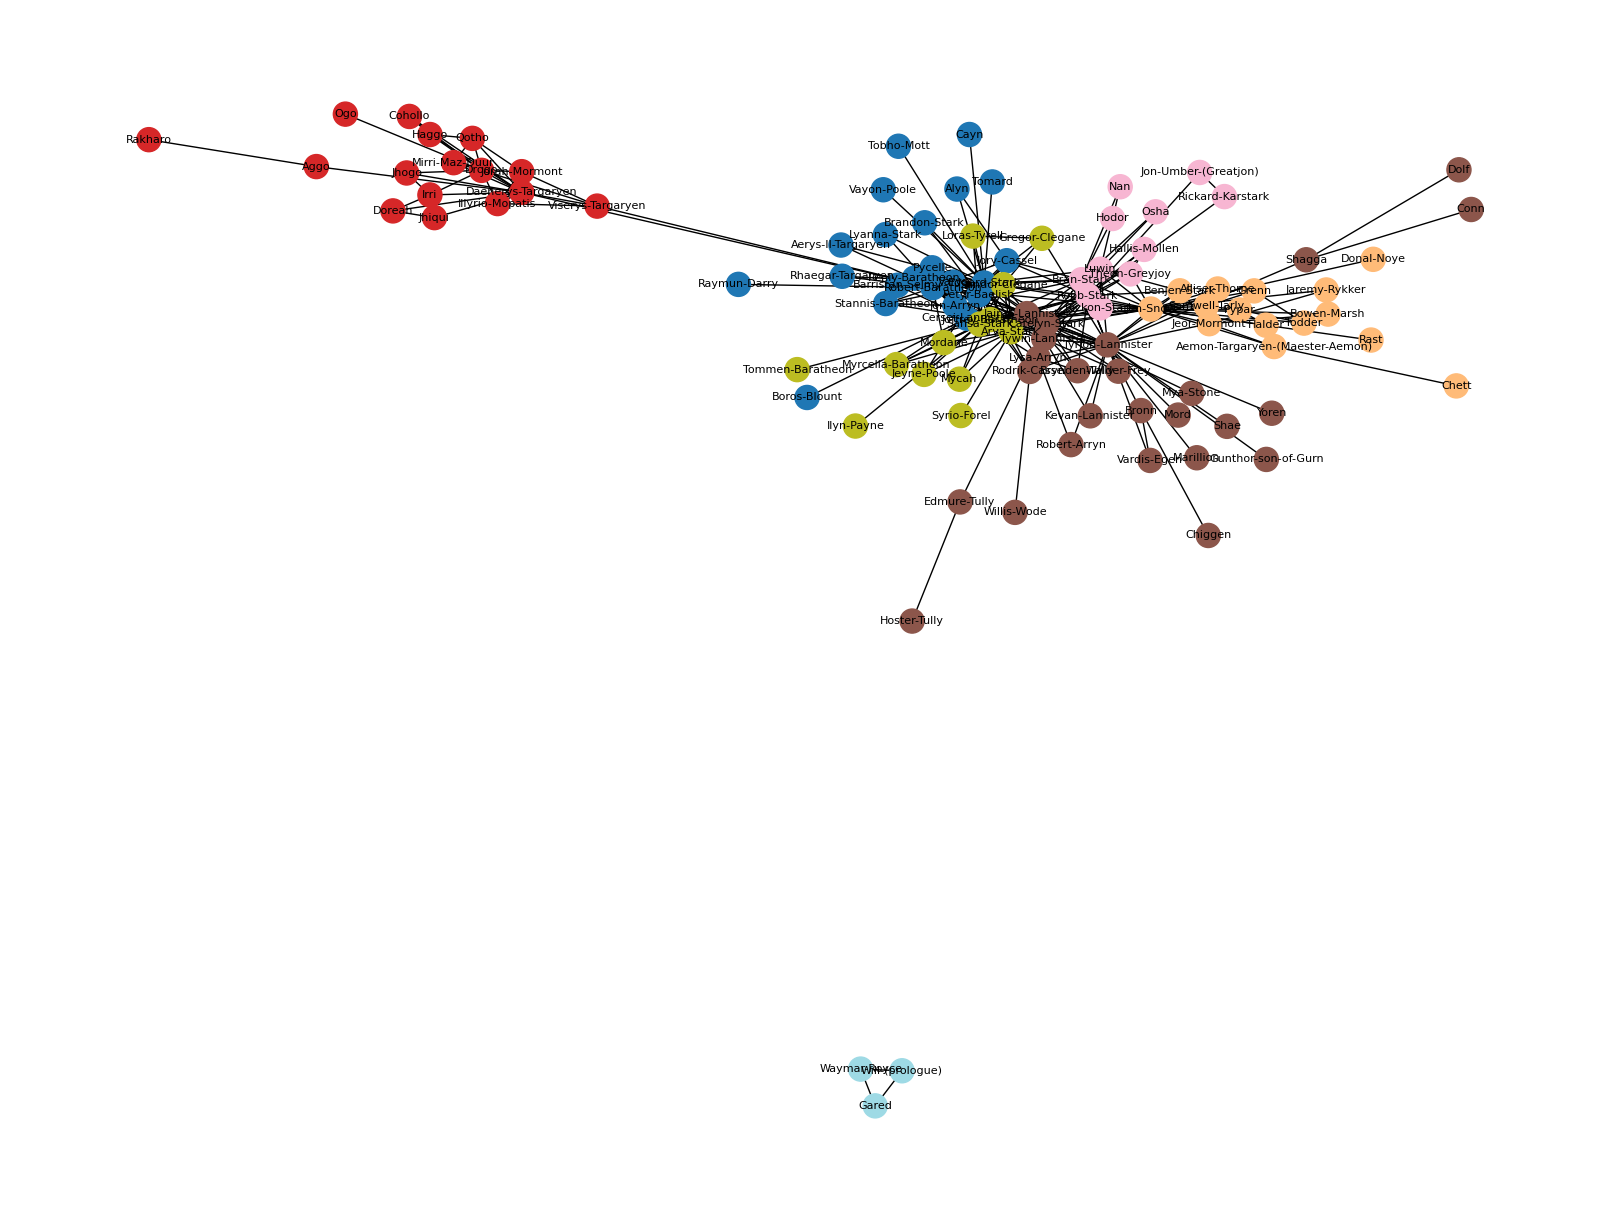

In [20]:
drawCommunities(filtered_G, communities_generator, 0.6 , 120)

## Book 2

In [21]:
df_edges = pd.read_csv('/content/asoiaf-book2-edges.csv')
df_nodes = pd.read_csv('/content/asoiaf-book2-nodes.csv')


### Preprocess

In [22]:
df_edges = df_edges.dropna()
df_nodes = df_nodes.dropna()


### First Look

In [23]:
G, filtered_G = createGraph(df_nodes,df_edges,10)
G.remove_node('Id')
G.remove_node('Label')


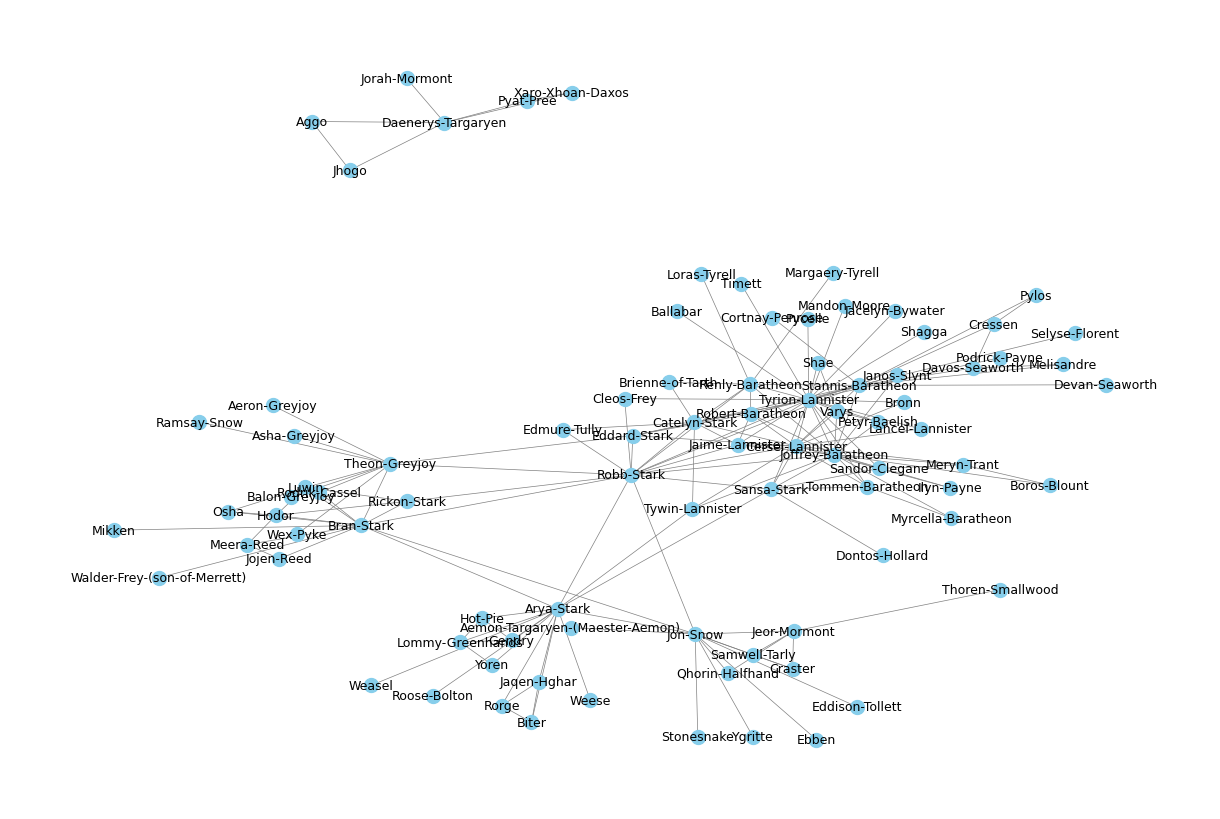

In [24]:
drawGraph(filtered_G, 0.15, 20)

### Degree Distribution


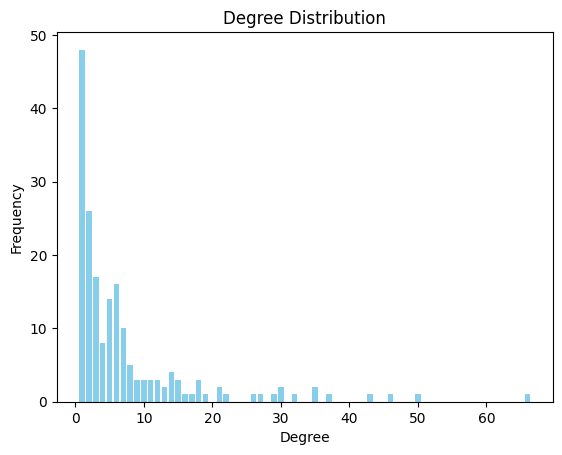

In [119]:
degreeCount2 = plotDegreeDistribution(G)


### Centrality


#### Betweenness



Top 10 nodes with highest betweenness centrality:
Arya-Stark: 0.1882
Jon-Snow: 0.1744
Robb-Stark: 0.1644
Tyrion-Lannister: 0.1553
Robert-Baratheon: 0.1537
Theon-Greyjoy: 0.1464
Stannis-Baratheon: 0.1195
Bran-Stark: 0.1131
Catelyn-Stark: 0.1112
Joffrey-Baratheon: 0.0908


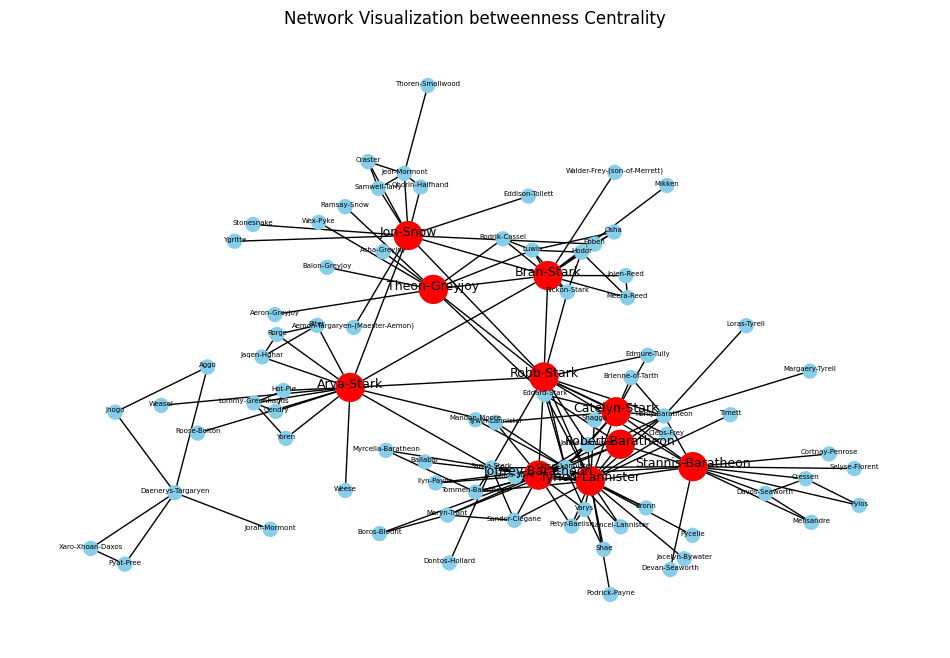

In [26]:
# Calculate Betweenness Centrality
betweenness = nx.betweenness_centrality(G)
betweenness_Book2 = centralityGraph(filtered_G, betweenness, "betweenness",1,70)


updateCentralityDict('Jon-Snow', 2, BetweennessCentralitydict_MainCharacter, betweenness)
updateCentralityDict('Tyrion-Lannister', 2, BetweennessCentralitydict_MainCharacter, betweenness)
updateCentralityDict('Daenerys-Targaryen', 2, BetweennessCentralitydict_MainCharacter, betweenness)
updateCentralityDict('Eddard-Stark', 2, BetweennessCentralitydict_MainCharacter, betweenness)
updateCentralityDict('Cersei-Lannister', 2, BetweennessCentralitydict_MainCharacter, betweenness)

updateCentralityDict('Robb-Stark', 2, BetweennessCentralitydict_StarkVSLannister, betweenness)
updateCentralityDict('Sansa-Stark', 2, BetweennessCentralitydict_StarkVSLannister, betweenness)
updateCentralityDict('Catelyn-Stark', 2, BetweennessCentralitydict_StarkVSLannister, betweenness)
updateCentralityDict('Cersei-Lannister', 2, BetweennessCentralitydict_StarkVSLannister, betweenness)
updateCentralityDict('Jaime-Lannister', 2, BetweennessCentralitydict_StarkVSLannister, betweenness)
updateCentralityDict('Tyrion-Lannister', 2, BetweennessCentralitydict_StarkVSLannister, betweenness)

updateCentralityDict('Robb-Stark', 2, BetweennessCentralitydict_WarOfKings, betweenness)
updateCentralityDict('Joffrey-Baratheon', 2, BetweennessCentralitydict_WarOfKings, betweenness)
updateCentralityDict('Stannis-Baratheon', 2, BetweennessCentralitydict_WarOfKings, betweenness)
updateCentralityDict('Renly-Baratheon', 2, BetweennessCentralitydict_WarOfKings, betweenness)

#### Degree


Top 10 nodes with highest Degree centrality:
Tyrion-Lannister: 0.2054
Joffrey-Baratheon: 0.1822
Cersei-Lannister: 0.1667
Arya-Stark: 0.1550
Stannis-Baratheon: 0.1434
Robb-Stark: 0.1357
Catelyn-Stark: 0.1279
Theon-Greyjoy: 0.1240
Renly-Baratheon: 0.1202
Bran-Stark: 0.1163


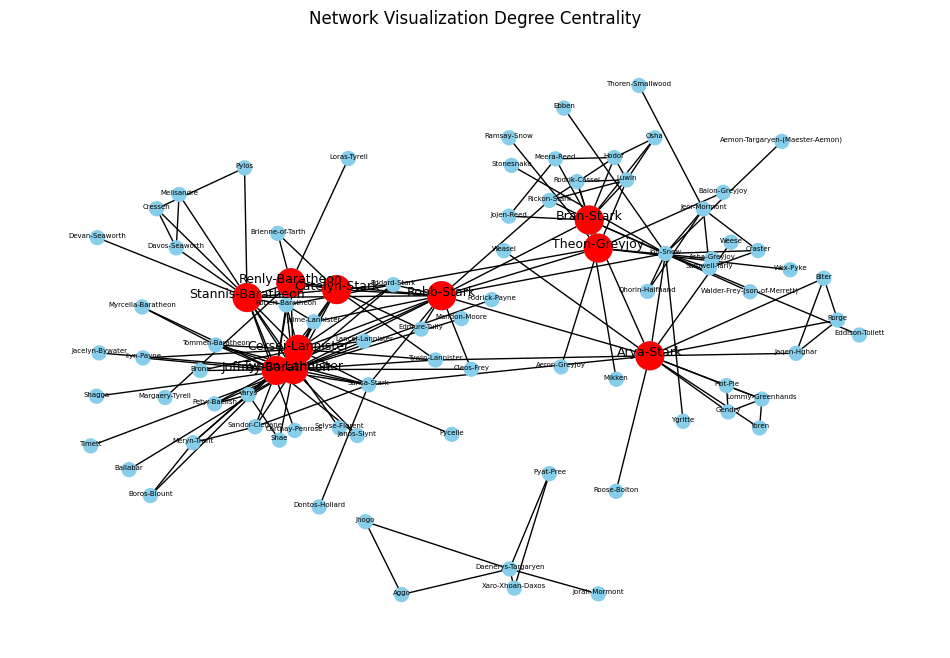

In [27]:
ds = nx.degree_centrality(G)
degree_Book2 = centralityGraph(filtered_G, ds, "Degree", 3.5, 200)


updateCentralityDict('Jon-Snow', 2, DegreeCentralitydict_MainCharacter, ds)
updateCentralityDict('Tyrion-Lannister', 2, DegreeCentralitydict_MainCharacter, ds)
updateCentralityDict('Daenerys-Targaryen', 2, DegreeCentralitydict_MainCharacter, ds)
updateCentralityDict('Eddard-Stark', 2, DegreeCentralitydict_MainCharacter, ds)
updateCentralityDict('Cersei-Lannister', 2, DegreeCentralitydict_MainCharacter, ds)

updateCentralityDict('Robb-Stark', 2, DegreeCentralitydict_StarkVSLannister, ds)
updateCentralityDict('Sansa-Stark', 2, DegreeCentralitydict_StarkVSLannister, ds)
updateCentralityDict('Catelyn-Stark', 2, DegreeCentralitydict_StarkVSLannister, ds)
updateCentralityDict('Cersei-Lannister', 2, DegreeCentralitydict_StarkVSLannister, ds)
updateCentralityDict('Jaime-Lannister', 2, DegreeCentralitydict_StarkVSLannister, ds)
updateCentralityDict('Tyrion-Lannister', 2, DegreeCentralitydict_StarkVSLannister, ds)

updateCentralityDict('Robb-Stark', 2, DegreeCentralitydict_WarOfKings, ds)
updateCentralityDict('Joffrey-Baratheon', 2, DegreeCentralitydict_WarOfKings, ds)
updateCentralityDict('Stannis-Baratheon', 2, DegreeCentralitydict_WarOfKings, ds)
updateCentralityDict('Renly-Baratheon', 2, DegreeCentralitydict_WarOfKings, ds)


#### Closeness


Top 10 nodes with highest Closeness centrality:
Robb-Stark: 0.4778
Eddard-Stark: 0.4574
Robert-Baratheon: 0.4487
Jaime-Lannister: 0.4471
Tyrion-Lannister: 0.4441
Joffrey-Baratheon: 0.4388
Arya-Stark: 0.4351
Catelyn-Stark: 0.4336
Cersei-Lannister: 0.4307
Sansa-Stark: 0.4307


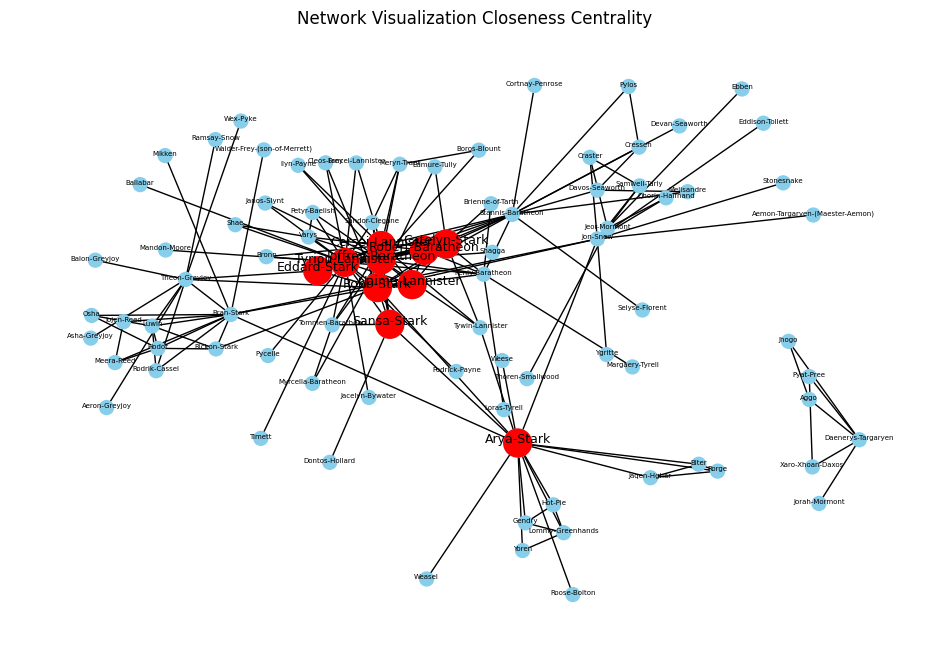

In [28]:
closeness = nx.closeness_centrality(G)
closeness_Book2 = centralityGraph(filtered_G, closeness, "Closeness", 1.6, 90)

updateCentralityDict('Jon-Snow', 2, ClosnessCentralitydict_MainCharacter, closeness)
updateCentralityDict('Tyrion-Lannister', 2, ClosnessCentralitydict_MainCharacter, closeness)
updateCentralityDict('Daenerys-Targaryen', 2, ClosnessCentralitydict_MainCharacter, closeness)
updateCentralityDict('Eddard-Stark', 2, ClosnessCentralitydict_MainCharacter, closeness)
updateCentralityDict('Cersei-Lannister', 3, ClosnessCentralitydict_MainCharacter, closeness)

updateCentralityDict('Robb-Stark', 2, ClosnessCentralitydict_StarkVSLannister, closeness)
updateCentralityDict('Sansa-Stark', 2, ClosnessCentralitydict_StarkVSLannister, closeness)
updateCentralityDict('Catelyn-Stark', 2, ClosnessCentralitydict_StarkVSLannister, closeness)
updateCentralityDict('Cersei-Lannister', 2, ClosnessCentralitydict_StarkVSLannister, closeness)
updateCentralityDict('Jaime-Lannister', 2, ClosnessCentralitydict_StarkVSLannister, closeness)
updateCentralityDict('Tyrion-Lannister', 2, ClosnessCentralitydict_StarkVSLannister, closeness)

updateCentralityDict('Robb-Stark', 2, ClosnessCentralitydict_WarOfKings, closeness)
updateCentralityDict('Joffrey-Baratheon', 2, ClosnessCentralitydict_WarOfKings, closeness)
updateCentralityDict('Stannis-Baratheon', 2, ClosnessCentralitydict_WarOfKings, closeness)
updateCentralityDict('Renly-Baratheon', 2, ClosnessCentralitydict_WarOfKings, closeness)


### Communities

In [29]:
communities_generator_book2 = nx.community.louvain_communities(filtered_G)

for i, community in enumerate(communities_generator_book2):
  print(f"Community {i + 1}: {list(community)}")


Community 1: ['Timett', 'Joffrey-Baratheon', 'Bronn', 'Ilyn-Payne', 'Ballabar', 'Meryn-Trant', 'Shagga', 'Tommen-Baratheon', 'Tyrion-Lannister', 'Cersei-Lannister', 'Mandon-Moore', 'Podrick-Payne', 'Myrcella-Baratheon', 'Pycelle', 'Boros-Blount', 'Jaime-Lannister', 'Varys', 'Shae', 'Lancel-Lannister', 'Janos-Slynt', 'Sandor-Clegane', 'Dontos-Hollard', 'Jacelyn-Bywater', 'Petyr-Baelish', 'Sansa-Stark']
Community 2: ['Jhogo', 'Aggo', 'Jorah-Mormont', 'Pyat-Pree', 'Daenerys-Targaryen', 'Xaro-Xhoan-Daxos']
Community 3: ['Roose-Bolton', 'Arya-Stark', 'Biter', 'Weese', 'Yoren', 'Rorge', 'Weasel', 'Lommy-Greenhands', 'Hot-Pie', 'Jaqen-Hghar', 'Tywin-Lannister', 'Gendry']
Community 4: ['Jeor-Mormont', 'Eddison-Tollett', 'Aemon-Targaryen-(Maester-Aemon)', 'Thoren-Smallwood', 'Ygritte', 'Ebben', 'Jon-Snow', 'Samwell-Tarly', 'Qhorin-Halfhand', 'Craster', 'Stonesnake']
Community 5: ['Rodrik-Cassel', 'Wex-Pyke', 'Bran-Stark', 'Ramsay-Snow', 'Hodor', 'Walder-Frey-(son-of-Merrett)', 'Meera-Reed', 'Ae

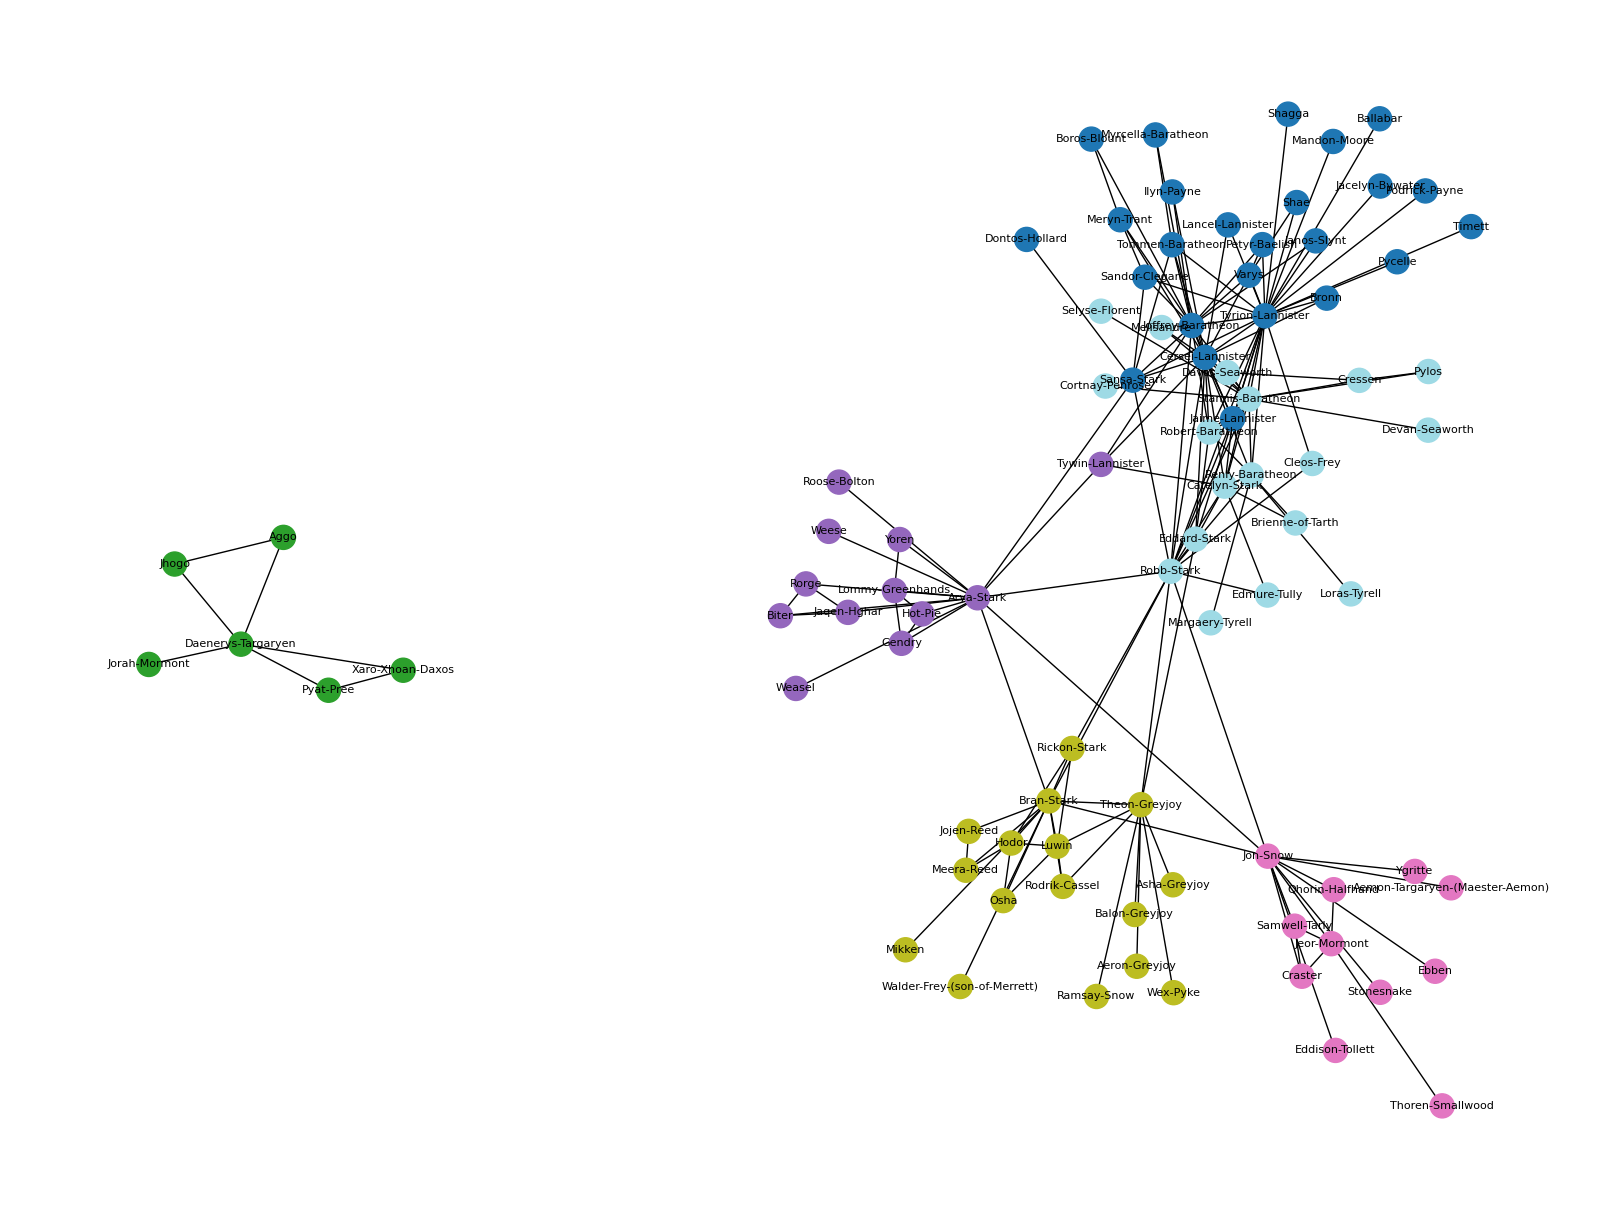

In [30]:
drawCommunities(filtered_G ,communities_generator_book2, 0.6 , 90)


## Book 3

In [31]:
df_edges = pd.read_csv('/content/asoiaf-book3-edges.csv')
df_nodes = pd.read_csv('/content/asoiaf-book3-nodes.csv')


### Preprocess

In [32]:
df_edges = df_edges.dropna()
df_nodes = df_nodes.dropna()


### First Look

In [33]:
G, filtered_G = createGraph(df_nodes,df_edges,8)
G.remove_node('Id')
G.remove_node('Label')


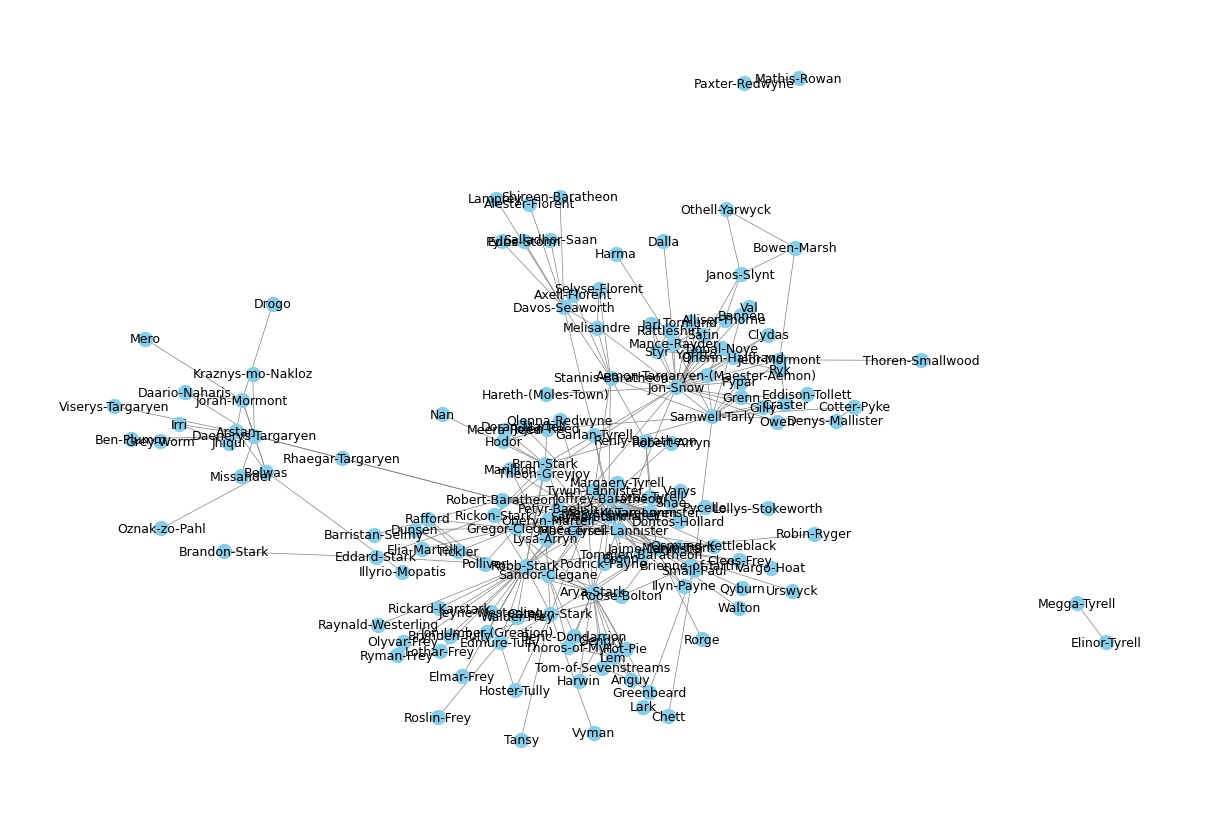

In [34]:
drawGraph(filtered_G, 0.15, 20)

### Degree Distribution


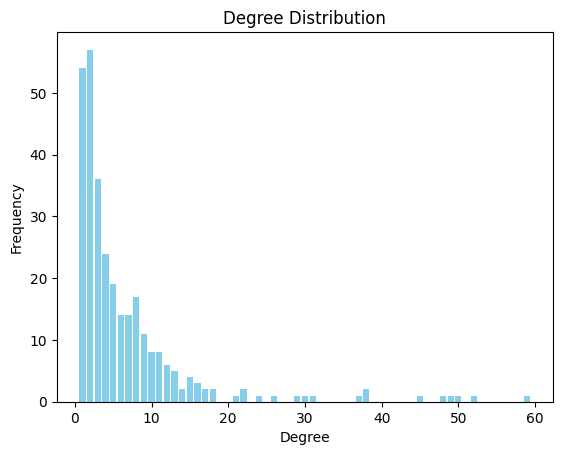

In [35]:
degreeCount3 = plotDegreeDistribution(G)

### Centrality


#### Betweenness



Top 10 nodes with highest betweenness centrality:
Jon-Snow: 0.2238
Robert-Baratheon: 0.1664
Robb-Stark: 0.1623
Tyrion-Lannister: 0.1541
Joffrey-Baratheon: 0.1419
Daenerys-Targaryen: 0.1365
Jaime-Lannister: 0.1245
Stannis-Baratheon: 0.1090
Arya-Stark: 0.0948
Sansa-Stark: 0.0896


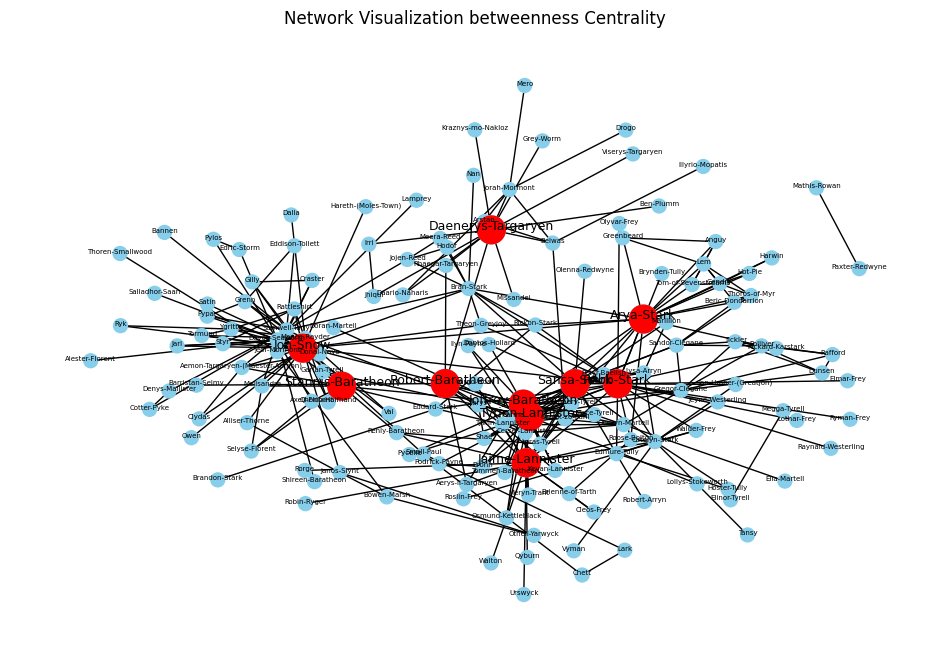

In [36]:
# Calculate Betweenness Centrality
betweenness = nx.betweenness_centrality(G)
betweenness_Book3 = centralityGraph(filtered_G, betweenness, "betweenness",1.1,80)


updateCentralityDict('Jon-Snow', 3, BetweennessCentralitydict_MainCharacter, betweenness)
updateCentralityDict('Tyrion-Lannister', 3, BetweennessCentralitydict_MainCharacter, betweenness)
updateCentralityDict('Daenerys-Targaryen', 3, BetweennessCentralitydict_MainCharacter, betweenness)
updateCentralityDict('Eddard-Stark', 3, BetweennessCentralitydict_MainCharacter, betweenness)
updateCentralityDict('Cersei-Lannister', 3, BetweennessCentralitydict_MainCharacter, betweenness)

updateCentralityDict('Robb-Stark', 3, BetweennessCentralitydict_StarkVSLannister , betweenness)
updateCentralityDict('Sansa-Stark', 3, BetweennessCentralitydict_StarkVSLannister , betweenness)
updateCentralityDict('Catelyn-Stark', 3, BetweennessCentralitydict_StarkVSLannister , betweenness)
updateCentralityDict('Cersei-Lannister', 3, BetweennessCentralitydict_StarkVSLannister , betweenness)
updateCentralityDict('Jaime-Lannister', 3, BetweennessCentralitydict_StarkVSLannister , betweenness)
updateCentralityDict('Tyrion-Lannister', 3, BetweennessCentralitydict_StarkVSLannister , betweenness)

updateCentralityDict('Robb-Stark', 3, BetweennessCentralitydict_WarOfKings, betweenness)
updateCentralityDict('Joffrey-Baratheon', 3, BetweennessCentralitydict_WarOfKings, betweenness)
updateCentralityDict('Stannis-Baratheon', 3, BetweennessCentralitydict_WarOfKings, betweenness)
updateCentralityDict('Renly-Baratheon', 3, BetweennessCentralitydict_WarOfKings, betweenness)

#### Degree


Top 10 nodes with highest Degree centrality:
Tyrion-Lannister: 0.1954
Jon-Snow: 0.1722
Joffrey-Baratheon: 0.1656
Robb-Stark: 0.1623
Sansa-Stark: 0.1589
Jaime-Lannister: 0.1490
Catelyn-Stark: 0.1258
Cersei-Lannister: 0.1258
Arya-Stark: 0.1225
Stannis-Baratheon: 0.1026


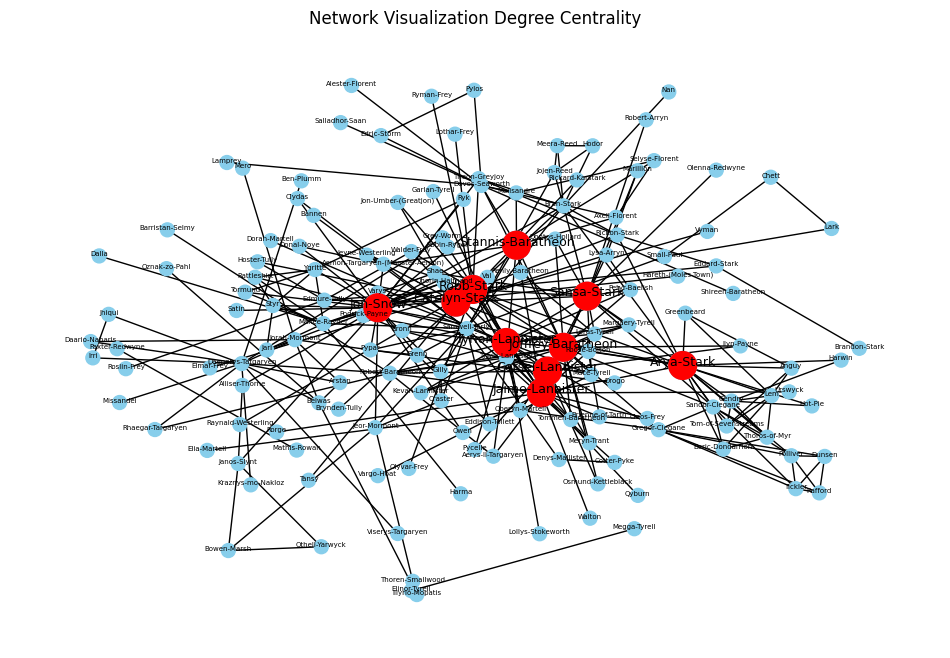

In [37]:
ds = nx.degree_centrality(G)
degree_Book3 = centralityGraph(filtered_G, ds, "Degree", 1.5, 90)

updateCentralityDict('Jon-Snow', 3, DegreeCentralitydict_MainCharacter, ds)
updateCentralityDict('Tyrion-Lannister', 3, DegreeCentralitydict_MainCharacter, ds)
updateCentralityDict('Daenerys-Targaryen', 3, DegreeCentralitydict_MainCharacter, ds)
updateCentralityDict('Eddard-Stark', 3, DegreeCentralitydict_MainCharacter, ds)
updateCentralityDict('Cersei-Lannister', 3, DegreeCentralitydict_MainCharacter, ds)

updateCentralityDict('Robb-Stark', 3, DegreeCentralitydict_StarkVSLannister, ds)
updateCentralityDict('Sansa-Stark', 3, DegreeCentralitydict_StarkVSLannister, ds)
updateCentralityDict('Catelyn-Stark', 3, DegreeCentralitydict_StarkVSLannister, ds)
updateCentralityDict('Cersei-Lannister', 3, DegreeCentralitydict_StarkVSLannister, ds)
updateCentralityDict('Jaime-Lannister', 3, DegreeCentralitydict_StarkVSLannister, ds)
updateCentralityDict('Tyrion-Lannister', 3, DegreeCentralitydict_StarkVSLannister, ds)

updateCentralityDict('Robb-Stark', 3, DegreeCentralitydict_WarOfKings, ds)
updateCentralityDict('Joffrey-Baratheon', 3, DegreeCentralitydict_WarOfKings, ds)
updateCentralityDict('Stannis-Baratheon', 3, DegreeCentralitydict_WarOfKings, ds)
updateCentralityDict('Renly-Baratheon', 3, DegreeCentralitydict_WarOfKings, ds)

#### Closeness


Top 10 nodes with highest Closeness centrality:
Joffrey-Baratheon: 0.4741
Tyrion-Lannister: 0.4576
Arya-Stark: 0.4428
Robb-Stark: 0.4402
Stannis-Baratheon: 0.4390
Robert-Baratheon: 0.4383
Jaime-Lannister: 0.4370
Jon-Snow: 0.4339
Eddard-Stark: 0.4266
Sansa-Stark: 0.4248


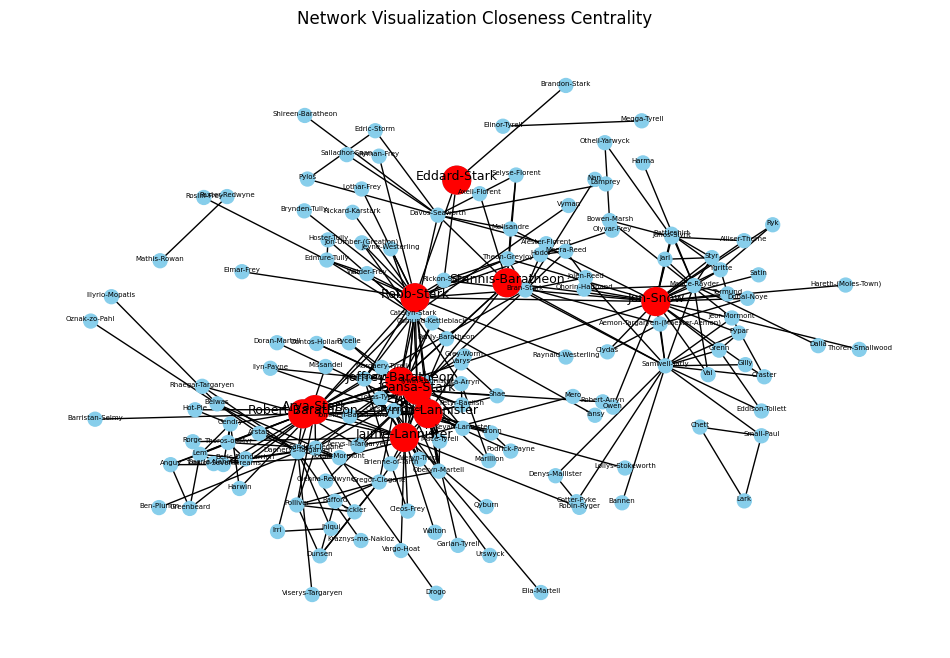

In [38]:
closeness = nx.closeness_centrality(G)
closeness_Book3 = centralityGraph(filtered_G, closeness, "Closeness", 1.2, 90)

updateCentralityDict('Jon-Snow', 3, ClosnessCentralitydict_MainCharacter, closeness)
updateCentralityDict('Tyrion-Lannister', 3, ClosnessCentralitydict_MainCharacter, closeness)
updateCentralityDict('Daenerys-Targaryen', 3, ClosnessCentralitydict_MainCharacter, closeness)
updateCentralityDict('Eddard-Stark', 3, ClosnessCentralitydict_MainCharacter, closeness)
updateCentralityDict('Cersei-Lannister', 3, ClosnessCentralitydict_MainCharacter, closeness)

updateCentralityDict('Robb-Stark', 3, ClosnessCentralitydict_StarkVSLannister, closeness)
updateCentralityDict('Sansa-Stark', 3, ClosnessCentralitydict_StarkVSLannister, closeness)
updateCentralityDict('Catelyn-Stark', 3, ClosnessCentralitydict_StarkVSLannister, closeness)
updateCentralityDict('Cersei-Lannister', 3, ClosnessCentralitydict_StarkVSLannister, closeness)
updateCentralityDict('Jaime-Lannister', 3, ClosnessCentralitydict_StarkVSLannister, closeness)
updateCentralityDict('Tyrion-Lannister', 3, ClosnessCentralitydict_StarkVSLannister, closeness)

updateCentralityDict('Robb-Stark', 3, ClosnessCentralitydict_WarOfKings, closeness)
updateCentralityDict('Joffrey-Baratheon', 3, ClosnessCentralitydict_WarOfKings, closeness)
updateCentralityDict('Stannis-Baratheon', 3, ClosnessCentralitydict_WarOfKings, closeness)
updateCentralityDict('Renly-Baratheon', 3, ClosnessCentralitydict_WarOfKings, closeness)

### Communities

In [39]:
communities_generator_book3 = nx.community.louvain_communities(filtered_G)

for i, community in enumerate(communities_generator_book3):
  print(f"Community {i + 1}: {list(community)}")


Community 1: ['Roose-Bolton', 'Jaime-Lannister', 'Vargo-Hoat', 'Brienne-of-Tarth', 'Rorge', 'Urswyck', 'Robert-Baratheon', 'Cleos-Frey', 'Qyburn', 'Barristan-Selmy', 'Aerys-II-Targaryen', 'Walton', 'Robin-Ryger']
Community 2: ['Joffrey-Baratheon', 'Bronn', 'Ilyn-Payne', 'Meryn-Trant', 'Tommen-Baratheon', 'Tyrion-Lannister', 'Cersei-Lannister', 'Podrick-Payne', 'Garlan-Tyrell', 'Osmund-Kettleblack', 'Mace-Tyrell', 'Pycelle', 'Tywin-Lannister', 'Lysa-Arryn', 'Doran-Martell', 'Varys', 'Shae', 'Olenna-Redwyne', 'Elia-Martell', 'Loras-Tyrell', 'Oberyn-Martell', 'Lollys-Stokeworth', 'Margaery-Tyrell', 'Robert-Arryn', 'Marillion', 'Dontos-Hollard', 'Kevan-Lannister', 'Petyr-Baelish', 'Sansa-Stark']
Community 3: ['Jon-Umber-(Greatjon)', 'Roslin-Frey', 'Rickard-Karstark', 'Jeyne-Westerling', 'Vyman', 'Robb-Stark', 'Eddard-Stark', 'Walder-Frey', 'Olyvar-Frey', 'Edmure-Tully', 'Ryman-Frey', 'Lothar-Frey', 'Brandon-Stark', 'Elmar-Frey', 'Catelyn-Stark', 'Brynden-Tully', 'Tansy', 'Raynald-Westerlin

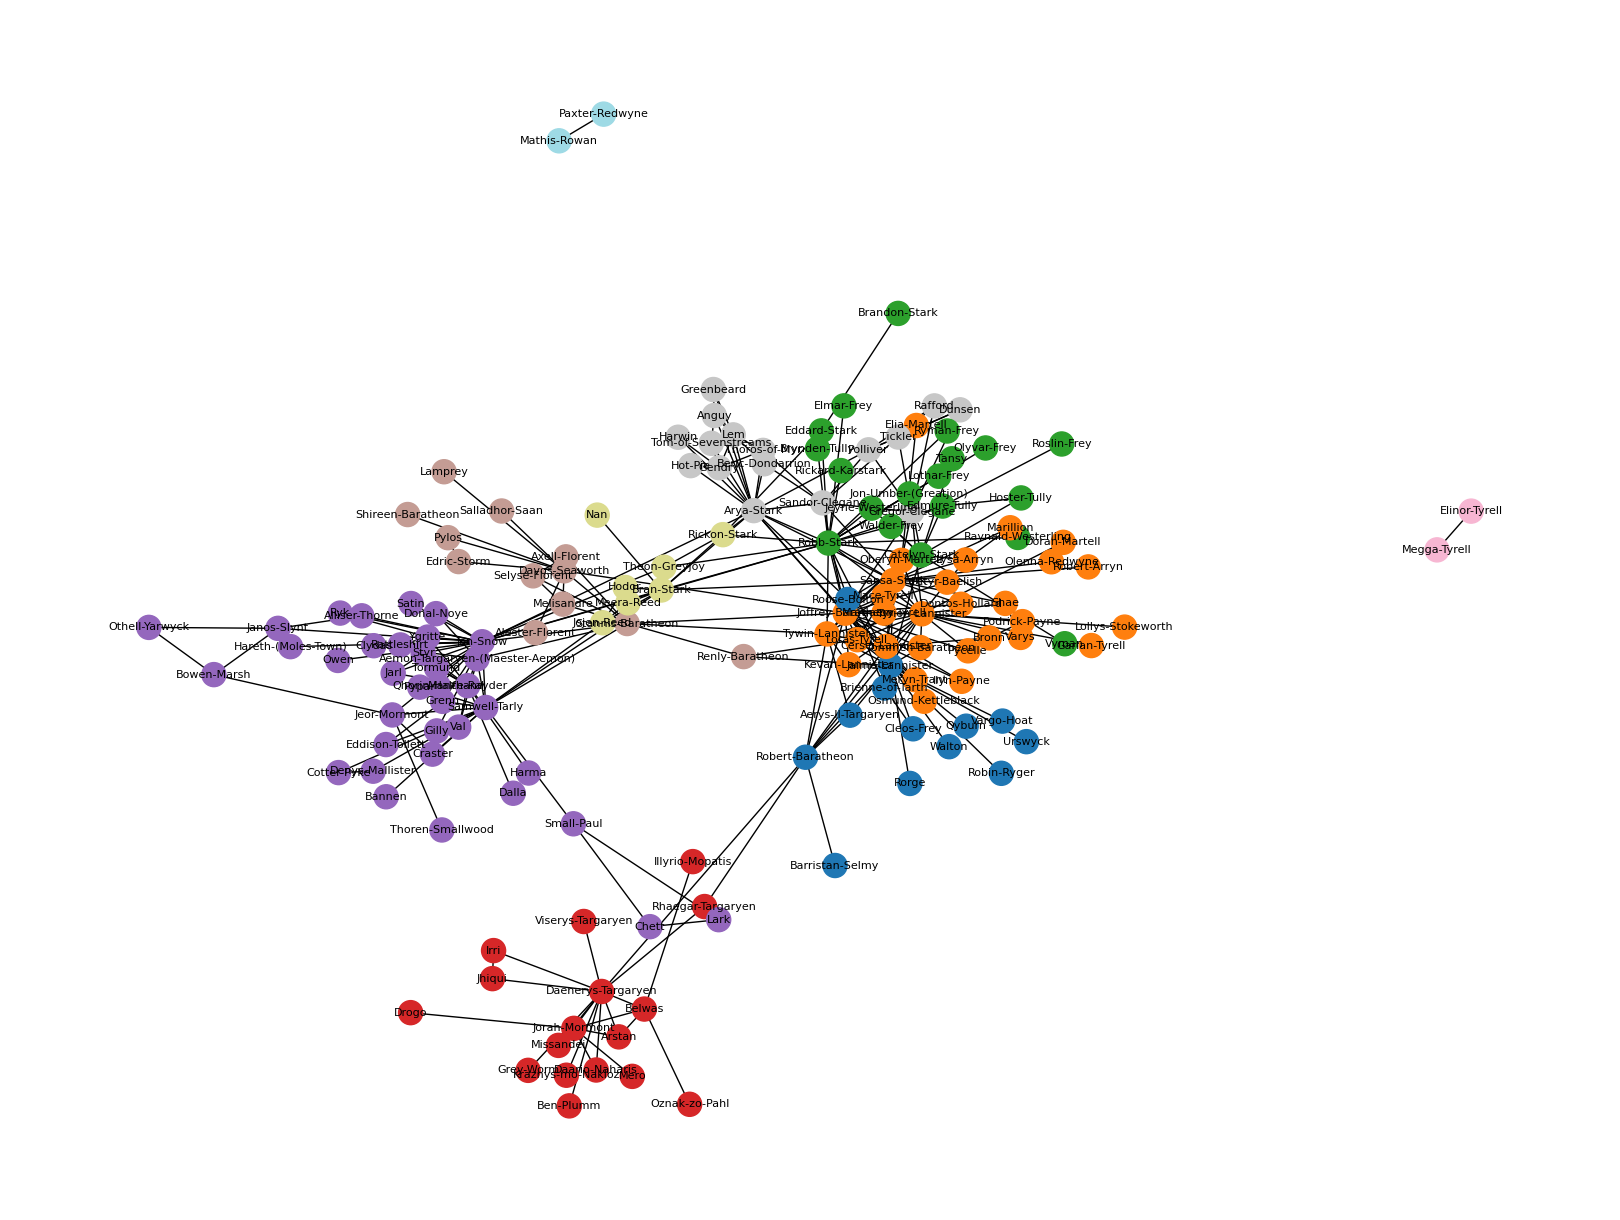

In [40]:
drawCommunities(filtered_G ,communities_generator_book3, 0.6 , 90)

## Book 4 5



the two books “A Feast for Crows” and “A Dance with Dragons” were carved apart because the fourth volume of the series was just too long. George R. R. Martin decided to cleave the book according to geography, making two interconnected narratives that evolve in parallel.

In [59]:
df_edges = pd.read_csv('/content/asoiaf-book45-edges.csv')
df_nodes = pd.read_csv('/content/asoiaf-book45-nodes.csv')


### Preprocess

In [60]:
df_edges = df_edges.dropna()
df_nodes = df_nodes.dropna()


### First Look

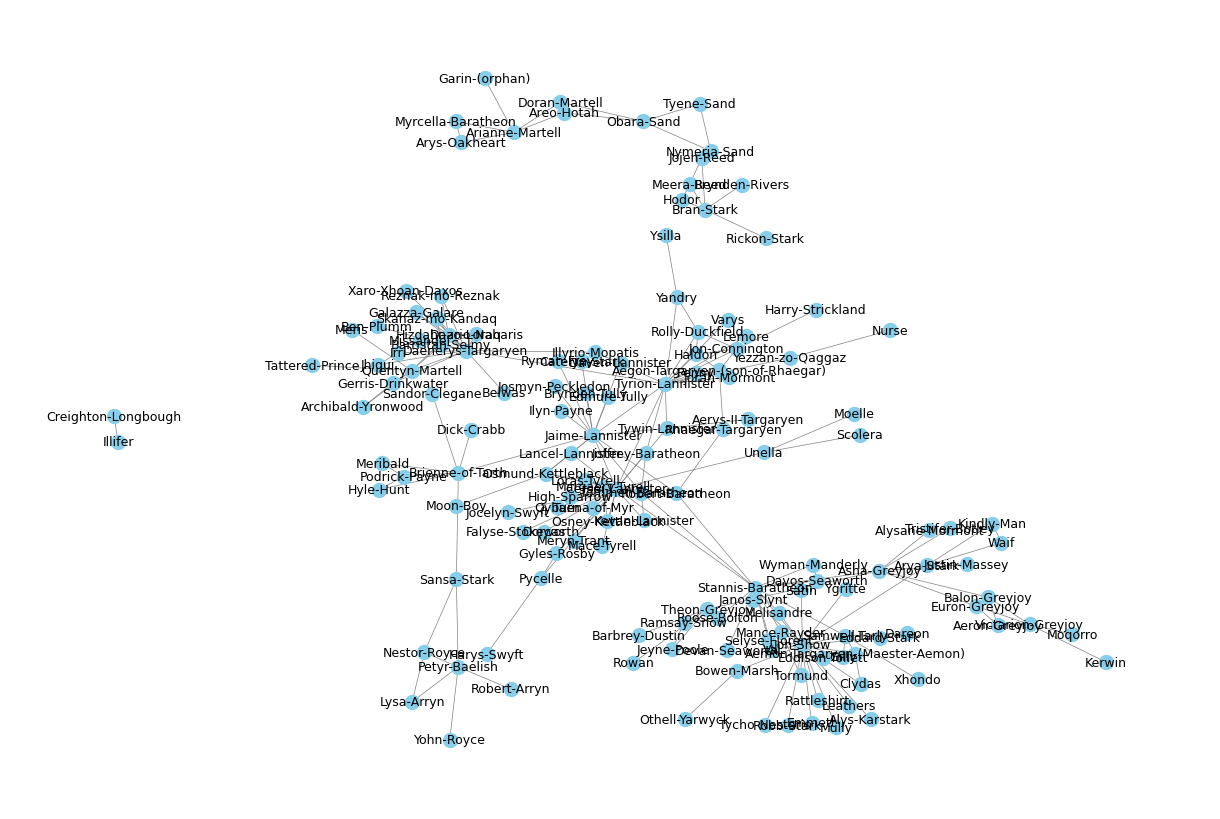

In [61]:
G, filtered_G = createGraph(df_nodes,df_edges,12)
G.remove_node('Id')
G.remove_node('Label')
drawGraph(filtered_G, 0.15, 20)

### Degree Distribution


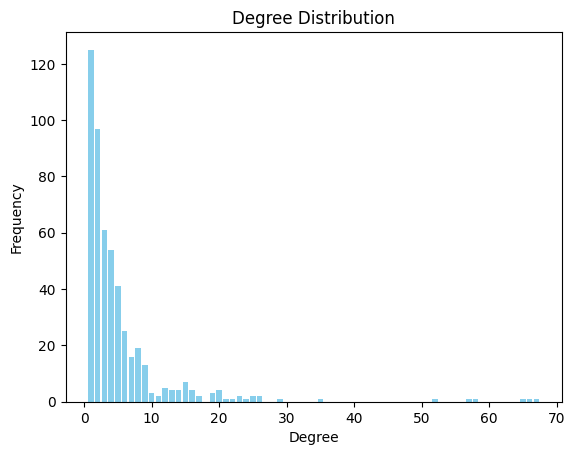

In [62]:
degreeCount45 = plotDegreeDistribution(G)

### Centrality


#### Betweenness



Top 10 nodes with highest betweenness centrality:
Stannis-Baratheon: 0.2353
Cersei-Lannister: 0.2336
Daenerys-Targaryen: 0.2038
Jon-Snow: 0.2012
Tyrion-Lannister: 0.1571
Jaime-Lannister: 0.1347
Sansa-Stark: 0.0840
Asha-Greyjoy: 0.0837
Theon-Greyjoy: 0.0829
Arya-Stark: 0.0680


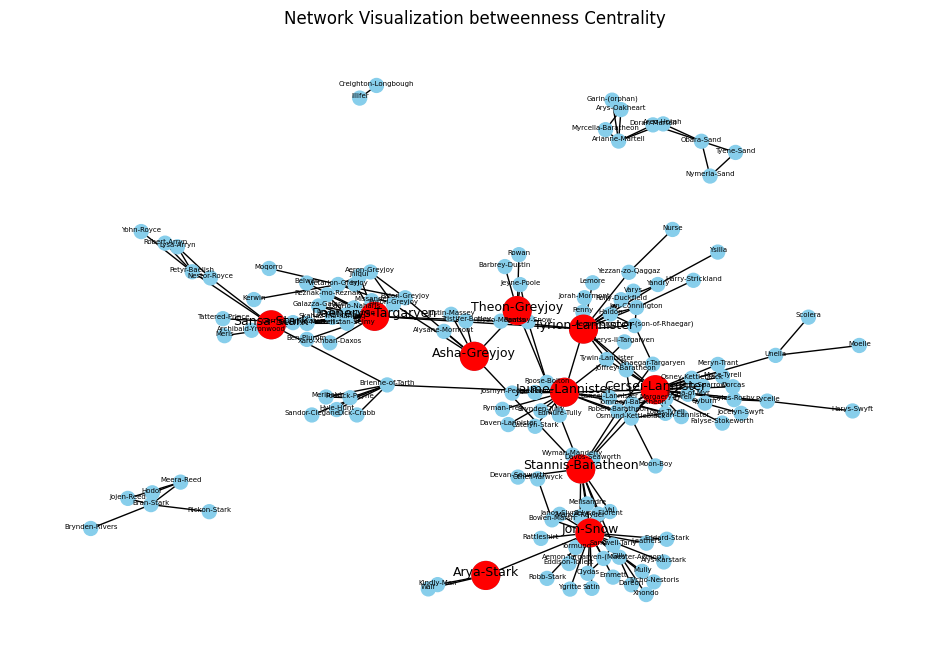

In [63]:
# Calculate Betweenness Centrality
betweenness = nx.betweenness_centrality(G)
betweenness_Book45 = centralityGraph(filtered_G, betweenness, "betweenness",0.5,70)

updateCentralityDict('Jon-Snow', 4, BetweennessCentralitydict_MainCharacter, betweenness)
updateCentralityDict('Tyrion-Lannister', 4, BetweennessCentralitydict_MainCharacter, betweenness)
updateCentralityDict('Daenerys-Targaryen', 4, BetweennessCentralitydict_MainCharacter, betweenness)
updateCentralityDict('Eddard-Stark', 4, BetweennessCentralitydict_MainCharacter, betweenness)
updateCentralityDict('Cersei-Lannister', 4, BetweennessCentralitydict_MainCharacter, betweenness)


updateCentralityDict('Robb-Stark', 4, BetweennessCentralitydict_StarkVSLannister, betweenness)
updateCentralityDict('Sansa-Stark', 4, BetweennessCentralitydict_StarkVSLannister, betweenness)
updateCentralityDict('Catelyn-Stark', 4, BetweennessCentralitydict_StarkVSLannister, betweenness)
updateCentralityDict('Cersei-Lannister', 4, BetweennessCentralitydict_StarkVSLannister, betweenness)
updateCentralityDict('Jaime-Lannister', 4, BetweennessCentralitydict_StarkVSLannister, betweenness)
updateCentralityDict('Tyrion-Lannister', 4, BetweennessCentralitydict_StarkVSLannister, betweenness)

updateCentralityDict('Robb-Stark', 4, BetweennessCentralitydict_WarOfKings, betweenness)
updateCentralityDict('Joffrey-Baratheon', 4, BetweennessCentralitydict_WarOfKings, betweenness)
updateCentralityDict('Stannis-Baratheon', 4, BetweennessCentralitydict_WarOfKings, betweenness)
updateCentralityDict('Renly-Baratheon', 4, BetweennessCentralitydict_WarOfKings, betweenness)

#### Degree


Top 10 nodes with highest Degree centrality:
Jaime-Lannister: 0.1327
Cersei-Lannister: 0.1307
Jon-Snow: 0.1287
Daenerys-Targaryen: 0.1149
Stannis-Baratheon: 0.1129
Tyrion-Lannister: 0.1030
Theon-Greyjoy: 0.0693
Brienne-of-Tarth: 0.0574
Sansa-Stark: 0.0515
Barristan-Selmy: 0.0515


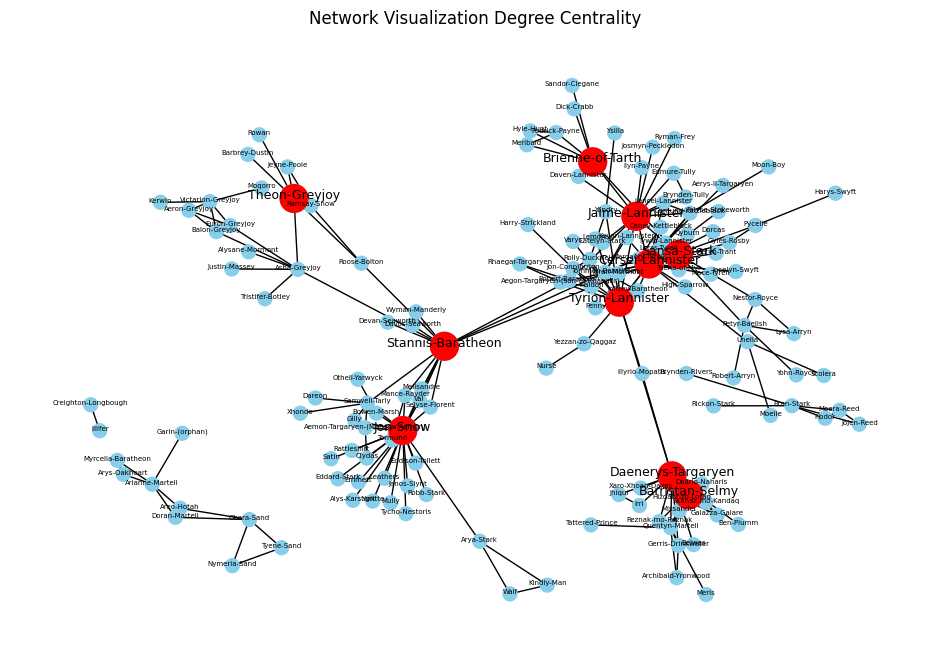

In [64]:
ds = nx.degree_centrality(G)
degree_Book45 = centralityGraph(filtered_G, ds, "Degree", 0.7,90)


updateCentralityDict('Jon-Snow', 4, DegreeCentralitydict_MainCharacter, ds)
updateCentralityDict('Tyrion-Lannister', 4, DegreeCentralitydict_MainCharacter, ds)
updateCentralityDict('Daenerys-Targaryen', 4, DegreeCentralitydict_MainCharacter, ds)
updateCentralityDict('Eddard-Stark', 4, DegreeCentralitydict_MainCharacter, ds)
updateCentralityDict('Cersei-Lannister', 4, DegreeCentralitydict_MainCharacter, ds)


updateCentralityDict('Robb-Stark', 4, DegreeCentralitydict_StarkVSLannister, ds)
updateCentralityDict('Sansa-Stark', 4, DegreeCentralitydict_StarkVSLannister, ds)
updateCentralityDict('Catelyn-Stark', 4, DegreeCentralitydict_StarkVSLannister, ds)
updateCentralityDict('Cersei-Lannister', 4, DegreeCentralitydict_StarkVSLannister, ds)
updateCentralityDict('Jaime-Lannister', 4, DegreeCentralitydict_StarkVSLannister, ds)
updateCentralityDict('Tyrion-Lannister', 4, DegreeCentralitydict_StarkVSLannister, ds)

updateCentralityDict('Robb-Stark', 4, DegreeCentralitydict_WarOfKings, ds)
updateCentralityDict('Joffrey-Baratheon', 4, DegreeCentralitydict_WarOfKings, ds)
updateCentralityDict('Stannis-Baratheon', 4, DegreeCentralitydict_WarOfKings, ds)
updateCentralityDict('Renly-Baratheon', 4, DegreeCentralitydict_WarOfKings, ds)

#### Closeness


Top 10 nodes with highest Closeness centrality:
Cersei-Lannister: 0.4338
Stannis-Baratheon: 0.4109
Tyrion-Lannister: 0.4089
Robert-Baratheon: 0.3945
Eddard-Stark: 0.3849
Jon-Snow: 0.3829
Sansa-Stark: 0.3814
Tywin-Lannister: 0.3777
Mace-Tyrell: 0.3732
Tommen-Baratheon: 0.3727


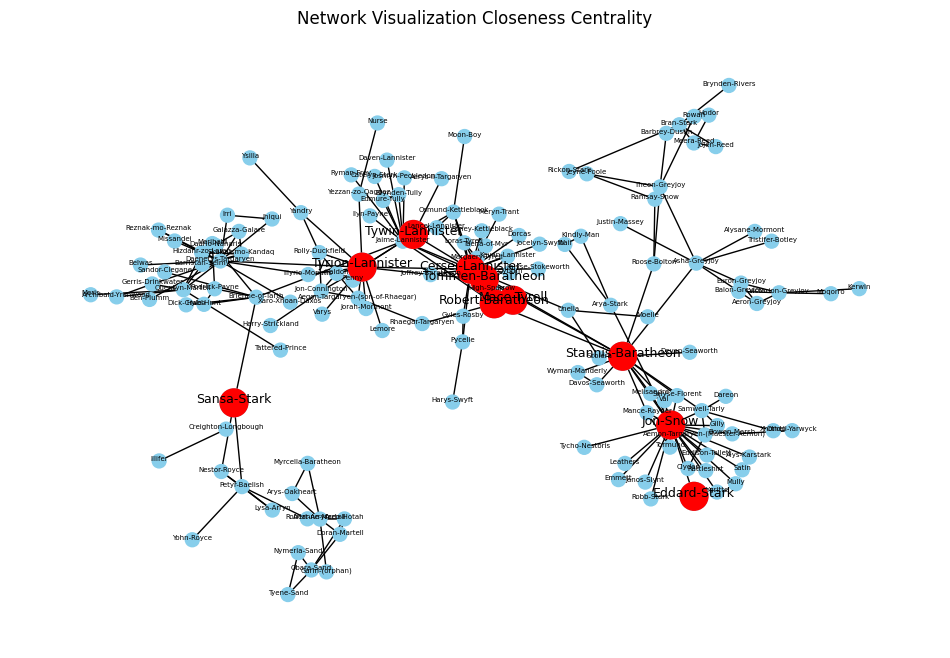

In [65]:
closeness = nx.closeness_centrality(G)
closeness_Book45 = centralityGraph(filtered_G, closeness, "Closeness", 0.8, 90)

updateCentralityDict('Jon-Snow', 4, ClosnessCentralitydict_MainCharacter, closeness)
updateCentralityDict('Tyrion-Lannister', 4, ClosnessCentralitydict_MainCharacter, closeness)
updateCentralityDict('Daenerys-Targaryen', 4, ClosnessCentralitydict_MainCharacter, closeness)
updateCentralityDict('Eddard-Stark', 4, ClosnessCentralitydict_MainCharacter, closeness)
updateCentralityDict('Cersei-Lannister', 4, ClosnessCentralitydict_MainCharacter, closeness)

updateCentralityDict('Robb-Stark', 4, ClosnessCentralitydict_StarkVSLannister, closeness)
updateCentralityDict('Sansa-Stark', 4, ClosnessCentralitydict_StarkVSLannister, closeness)
updateCentralityDict('Catelyn-Stark', 4, ClosnessCentralitydict_StarkVSLannister, closeness)
updateCentralityDict('Cersei-Lannister', 4, ClosnessCentralitydict_StarkVSLannister, closeness)
updateCentralityDict('Jaime-Lannister', 4, ClosnessCentralitydict_StarkVSLannister, closeness)
updateCentralityDict('Tyrion-Lannister', 4, ClosnessCentralitydict_StarkVSLannister, closeness)

updateCentralityDict('Robb-Stark', 4, ClosnessCentralitydict_WarOfKings, closeness)
updateCentralityDict('Joffrey-Baratheon', 4, ClosnessCentralitydict_WarOfKings, closeness)
updateCentralityDict('Stannis-Baratheon', 4, ClosnessCentralitydict_WarOfKings, closeness)
updateCentralityDict('Renly-Baratheon', 4, ClosnessCentralitydict_WarOfKings, closeness)

### Communities

In [107]:
communities_generator_book45 = nx.community.louvain_communities(filtered_G)

for i, community in enumerate(communities_generator_book45):
  print(f"Community {i + 1}: {list(community)}")


Community 1: ['Meribald', 'Yohn-Royce', 'Brienne-of-Tarth', 'Dick-Crabb', 'Robert-Arryn', 'Nestor-Royce', 'Sandor-Clegane', 'Podrick-Payne', 'Hyle-Hunt', 'Lysa-Arryn', 'Petyr-Baelish', 'Sansa-Stark']
Community 2: ['Moqorro', 'Aeron-Greyjoy', 'Asha-Greyjoy', 'Justin-Massey', 'Kerwin', 'Euron-Greyjoy', 'Balon-Greyjoy', 'Victarion-Greyjoy', 'Tristifer-Botley', 'Alysane-Mormont']
Community 3: ['Gerris-Drinkwater', 'Daenerys-Targaryen', 'Missandei', 'Quentyn-Martell', 'Daario-Naharis', 'Meris', 'Archibald-Yronwood', 'Ben-Plumm', 'Skahaz-mo-Kandaq', 'Xaro-Xhoan-Daxos', 'Hizdahr-zo-Loraq', 'Barristan-Selmy', 'Tattered-Prince', 'Irri', 'Galazza-Galare', 'Reznak-mo-Reznak', 'Jhiqui', 'Belwas']
Community 4: ['Hodor', 'Rickon-Stark', 'Jojen-Reed', 'Bran-Stark', 'Meera-Reed', 'Brynden-Rivers']
Community 5: ['Osney-Kettleblack', 'Joffrey-Baratheon', 'Ilyn-Payne', 'Meryn-Trant', 'Dorcas', 'Tommen-Baratheon', 'Robert-Baratheon', 'Cersei-Lannister', 'Jocelyn-Swyft', 'Mace-Tyrell', 'Pycelle', 'Edmure-T

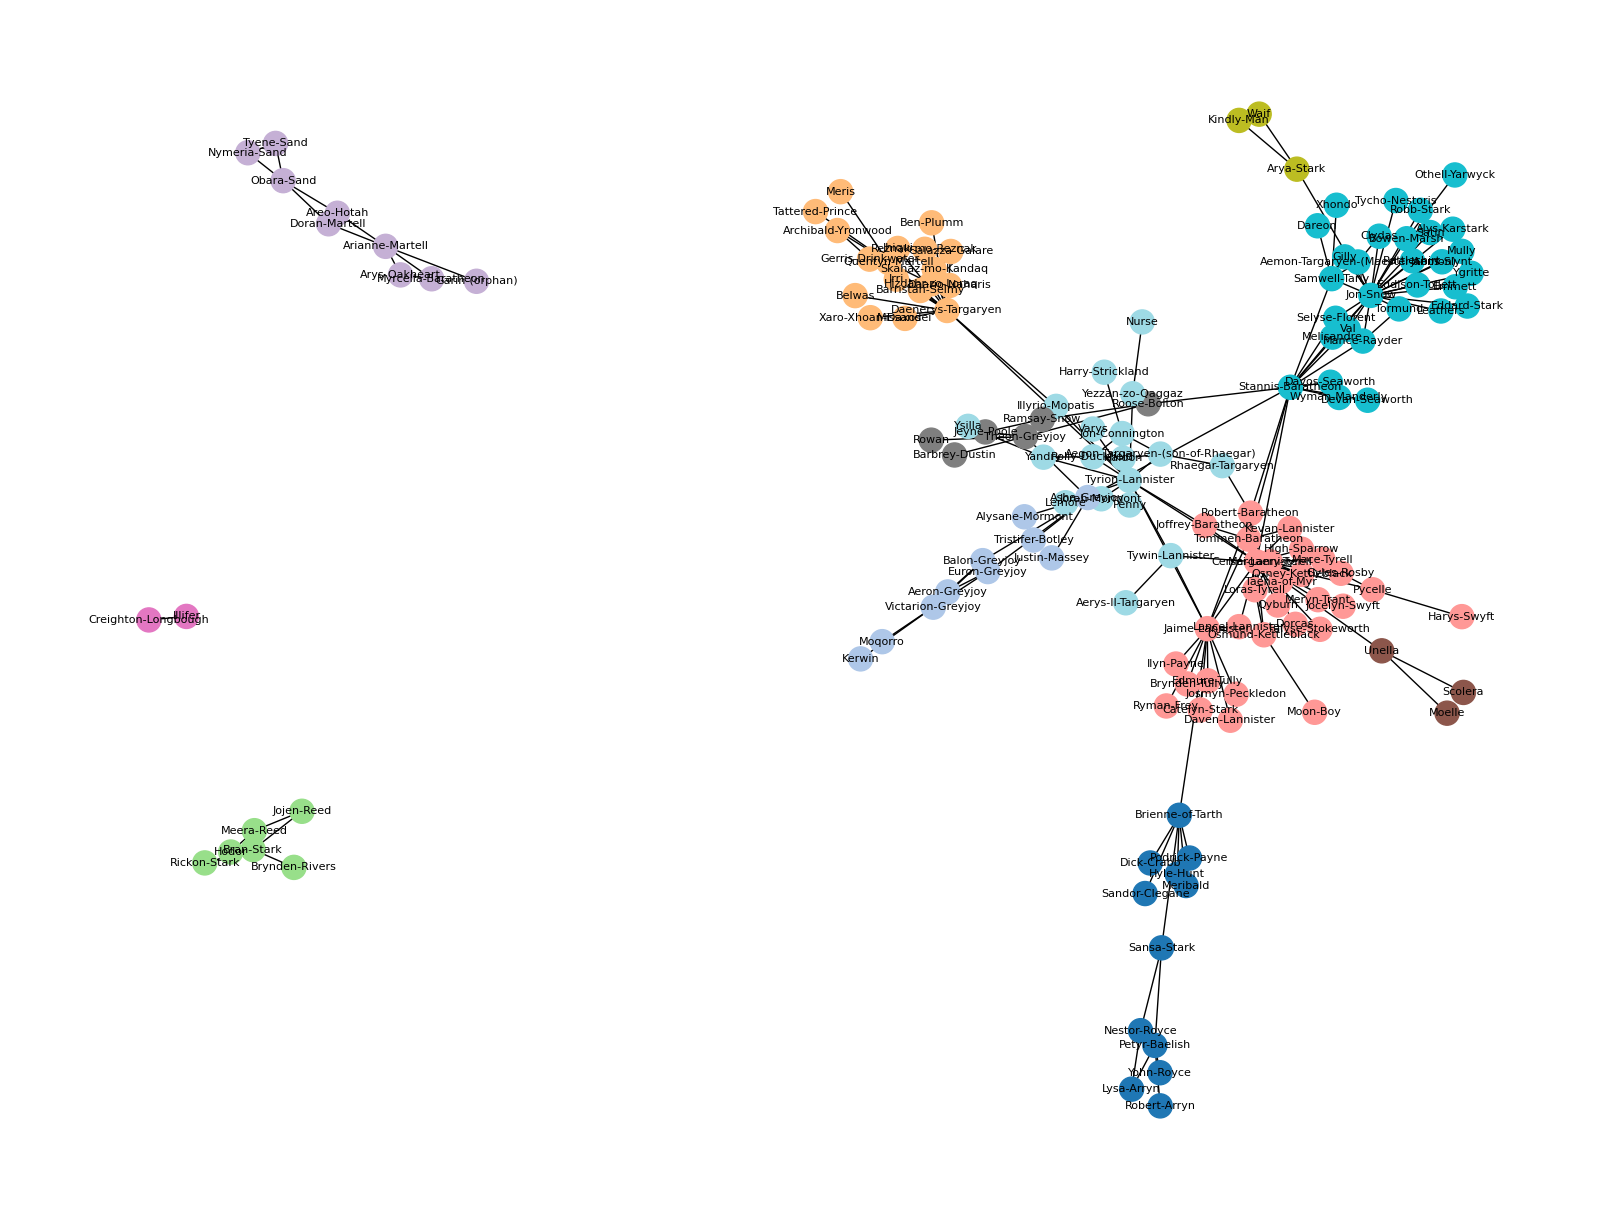

In [108]:
drawCommunities(filtered_G,communities_generator_book45, 0.8 , 200)

* the North (Jon Snow, Stannis)
* King’s Landing (Jaime, Cersei)
* Slaver’s Bay (Daenerys)


* the Vale and the Riverlands (Sansa, Brienne, Littlefinger)
* the Ironborn (Victarion, Asha)
* Westerosi in Essos (Tyrion)
* Winterfell/Braavos (Theon, Arya)
* Dorne (Arianne, Doran, Myrcella)

* the Haunted Forest (Bran)
* Old Town (connected to Sam)
* a band of four freefolk.

## All Books

In [125]:
df_edges = pd.read_csv('/content/asoiaf-all-edges.csv')
df_nodes = pd.read_csv('/content/asoiaf-all-nodes.csv')


### Preprocess

In [126]:
df_edges = df_edges.dropna()
df_nodes = df_nodes.dropna()


### First Look

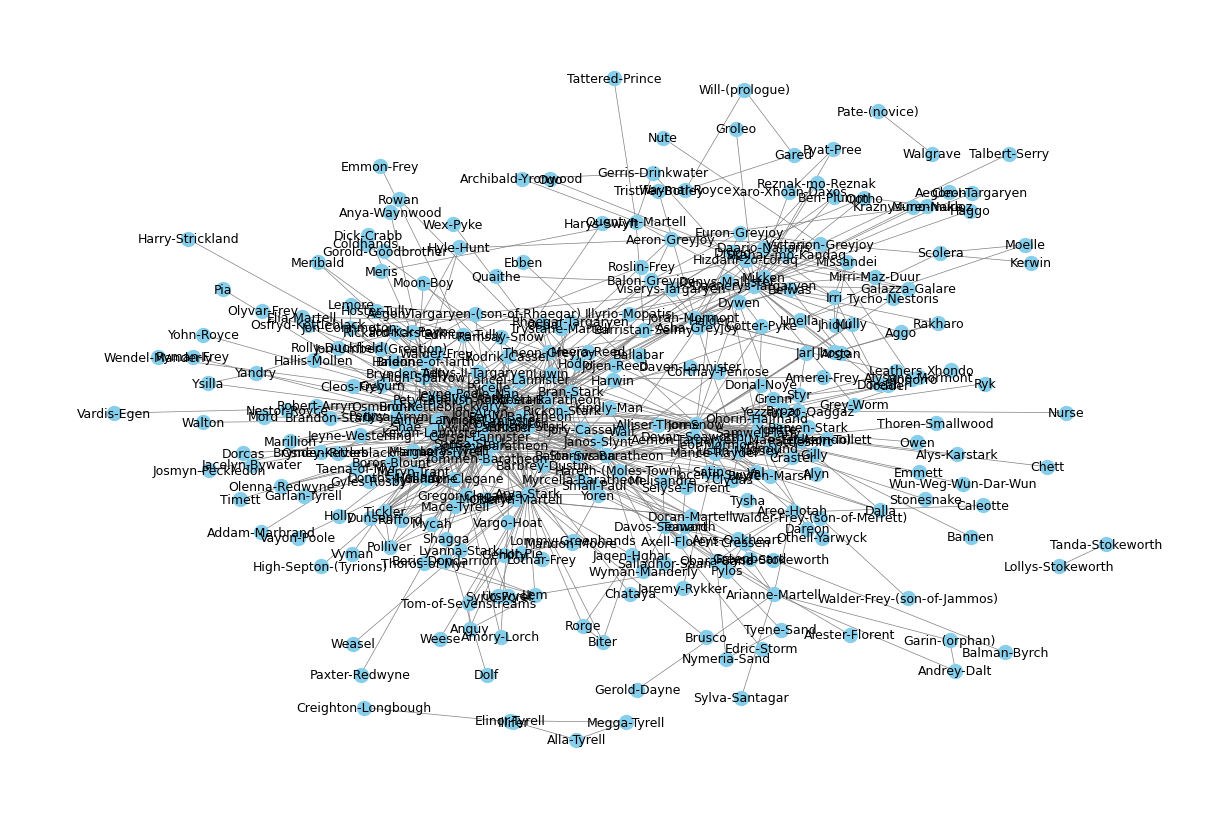

In [127]:
G, filtered_G = createGraph(df_nodes,df_edges,10)
G.remove_node('Id')
G.remove_node('Label')
drawGraph(filtered_G, 0.85, 70)

### Degree Distribution


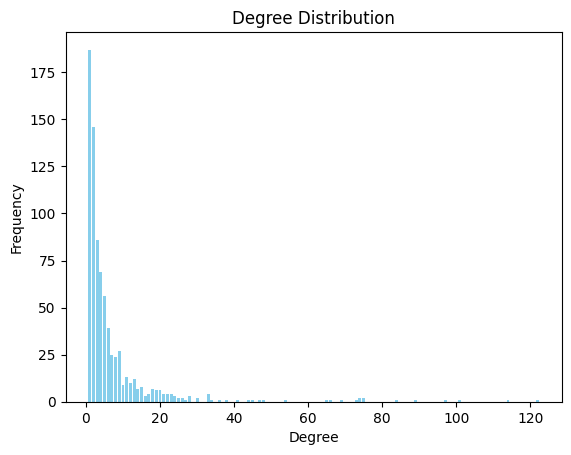

In [53]:
degreeCountAll = plotDegreeDistribution(G)

### Centrality


#### Betweenness



Top 10 nodes with highest betweenness centrality:
Jon-Snow: 0.1921
Tyrion-Lannister: 0.1622
Daenerys-Targaryen: 0.1184
Theon-Greyjoy: 0.1113
Stannis-Baratheon: 0.1101
Jaime-Lannister: 0.1008
Cersei-Lannister: 0.0887
Arya-Stark: 0.0872
Eddard-Stark: 0.0787
Robert-Baratheon: 0.0782


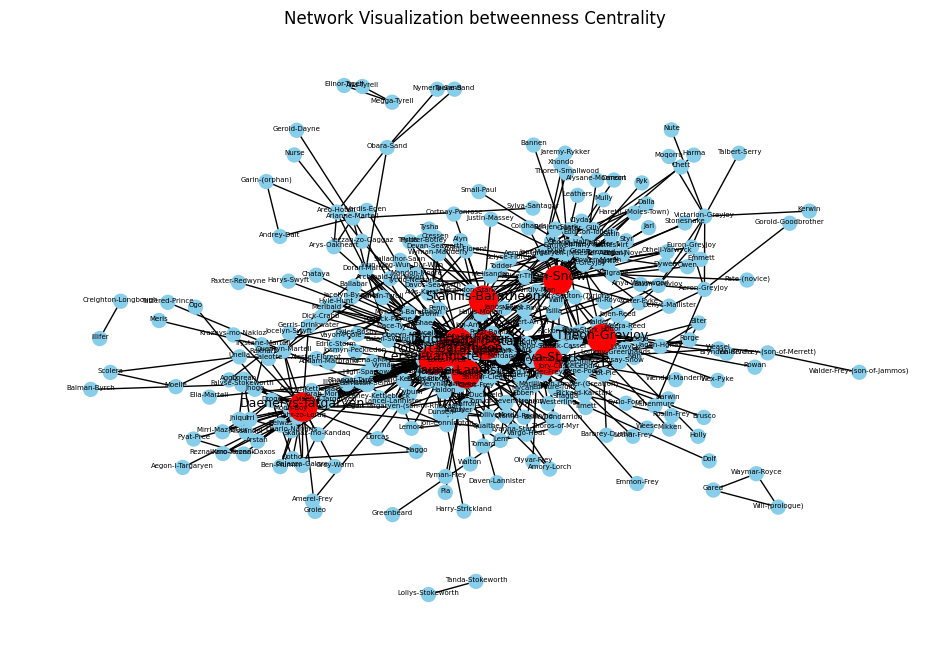

In [54]:
# Calculate Betweenness Centrality
betweenness = nx.betweenness_centrality(G)
betweenness_allBooks = centralityGraph(filtered_G, betweenness, "betweenness",0.6,60)

#### Degree


Top 10 nodes with highest Degree centrality:
Tyrion-Lannister: 0.1535
Jon-Snow: 0.1434
Jaime-Lannister: 0.1270
Cersei-Lannister: 0.1220
Stannis-Baratheon: 0.1119
Arya-Stark: 0.1057
Catelyn-Stark: 0.0943
Sansa-Stark: 0.0943
Robb-Stark: 0.0931
Eddard-Stark: 0.0931


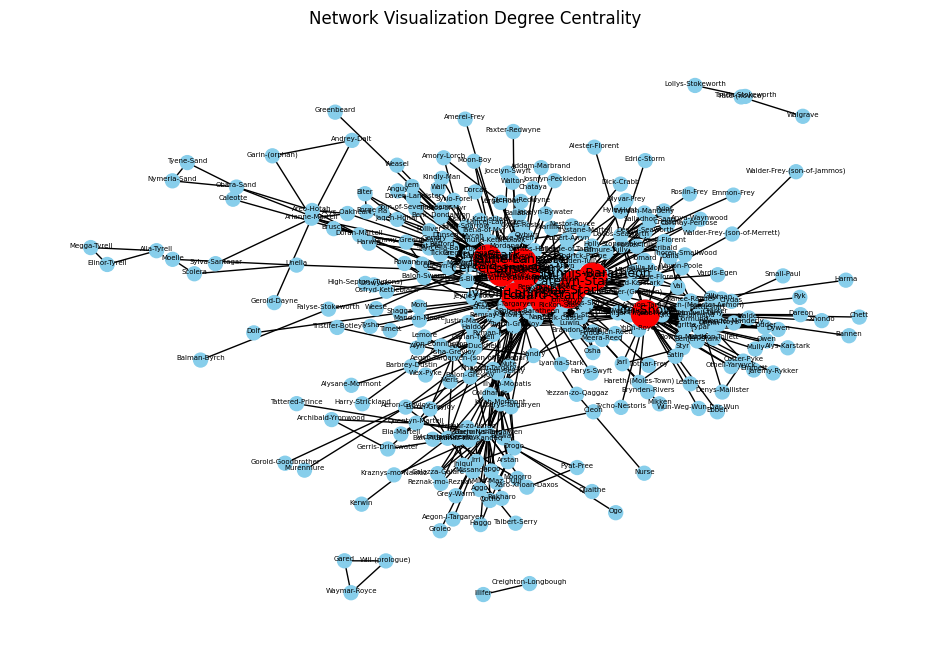

In [55]:
ds = nx.degree_centrality(G)
degree_allBooks = centralityGraph(filtered_G, ds, "Degree", 0.75, 90)


#### Closeness


Top 10 nodes with highest closeness centrality:
Tyrion-Lannister: 0.4763
Robert-Baratheon: 0.4593
Eddard-Stark: 0.4558
Cersei-Lannister: 0.4545
Jaime-Lannister: 0.4520
Jon-Snow: 0.4454
Stannis-Baratheon: 0.4446
Robb-Stark: 0.4441
Joffrey-Baratheon: 0.4340
Catelyn-Stark: 0.4335


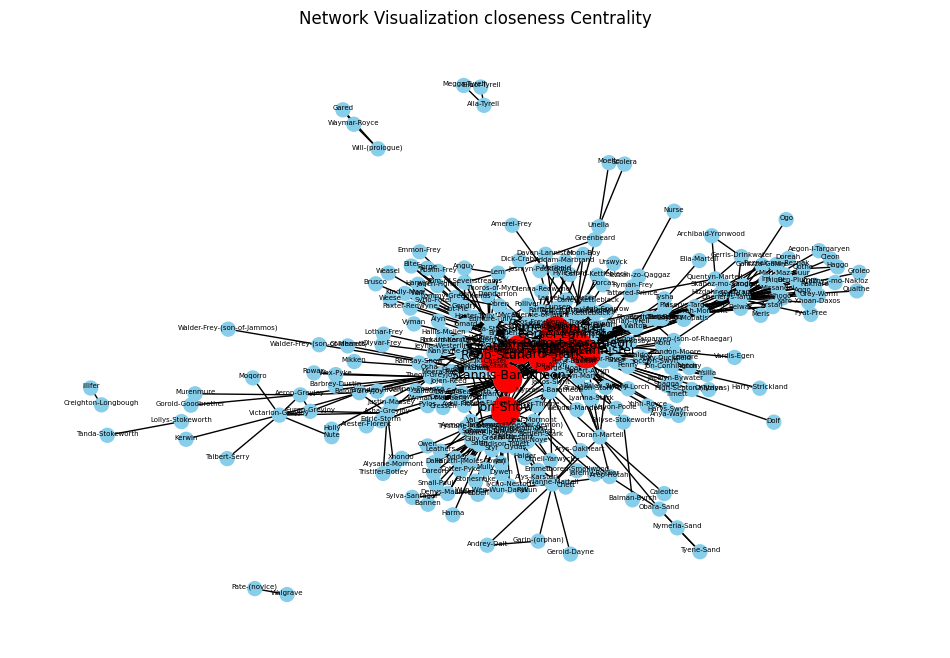

In [134]:
closeness = nx.closeness_centrality(G)
closeness_allBooks = centralityGraph(filtered_G,closeness, "closeness",0.75, 120)


### Communities

In [132]:
communities_generator_allbooks = nx.community.louvain_communities(filtered_G)

for i, community in enumerate(communities_generator_allbooks):
  print(f"Community {i + 1}: {list(community)}")


Community 1: ['Yoren', 'Tom-of-Sevenstreams', 'Anguy', 'Waif', 'Hot-Pie', 'Syrio-Forel', 'Greenbeard', 'Gendry', 'Arya-Stark', 'Biter', 'Weese', 'Thoros-of-Myr', 'Rorge', 'Weasel', 'Mordane', 'Brusco', 'Harwin', 'Lommy-Greenhands', 'Jaqen-Hghar', 'Mycah', 'Beric-Dondarrion', 'Kindly-Man', 'Lem']
Community 2: ['Stannis-Baratheon', 'Cortnay-Penrose', 'Tomard', 'Edric-Storm', 'Selyse-Florent', 'Renly-Baratheon', 'Vayon-Poole', 'Cressen', 'Jon-Arryn', 'Robert-Baratheon', 'Davos-Seaworth', 'Salladhor-Saan', 'Eddard-Stark', 'Wyman-Manderly', 'Alyn', 'Axell-Florent', 'Brandon-Stark', 'Elia-Martell', 'Alester-Florent', 'Melisandre', 'Pylos', 'Devan-Seaworth', 'Jory-Cassel', 'Rhaegar-Targaryen', 'Aerys-II-Targaryen', 'Lyanna-Stark']
Community 3: ['Illifer', 'Creighton-Longbough']
Community 4: ['Eddison-Tollett', 'Hareth-(Moles-Town)', 'Halder', 'Mance-Rayder', 'Harma', 'Ygritte', 'Benjen-Stark', 'Owen', 'Xhondo', 'Gilly', 'Craster', 'Clydas', 'Jeor-Mormont', 'Donal-Noye', 'Rattleshirt', 'Jaremy

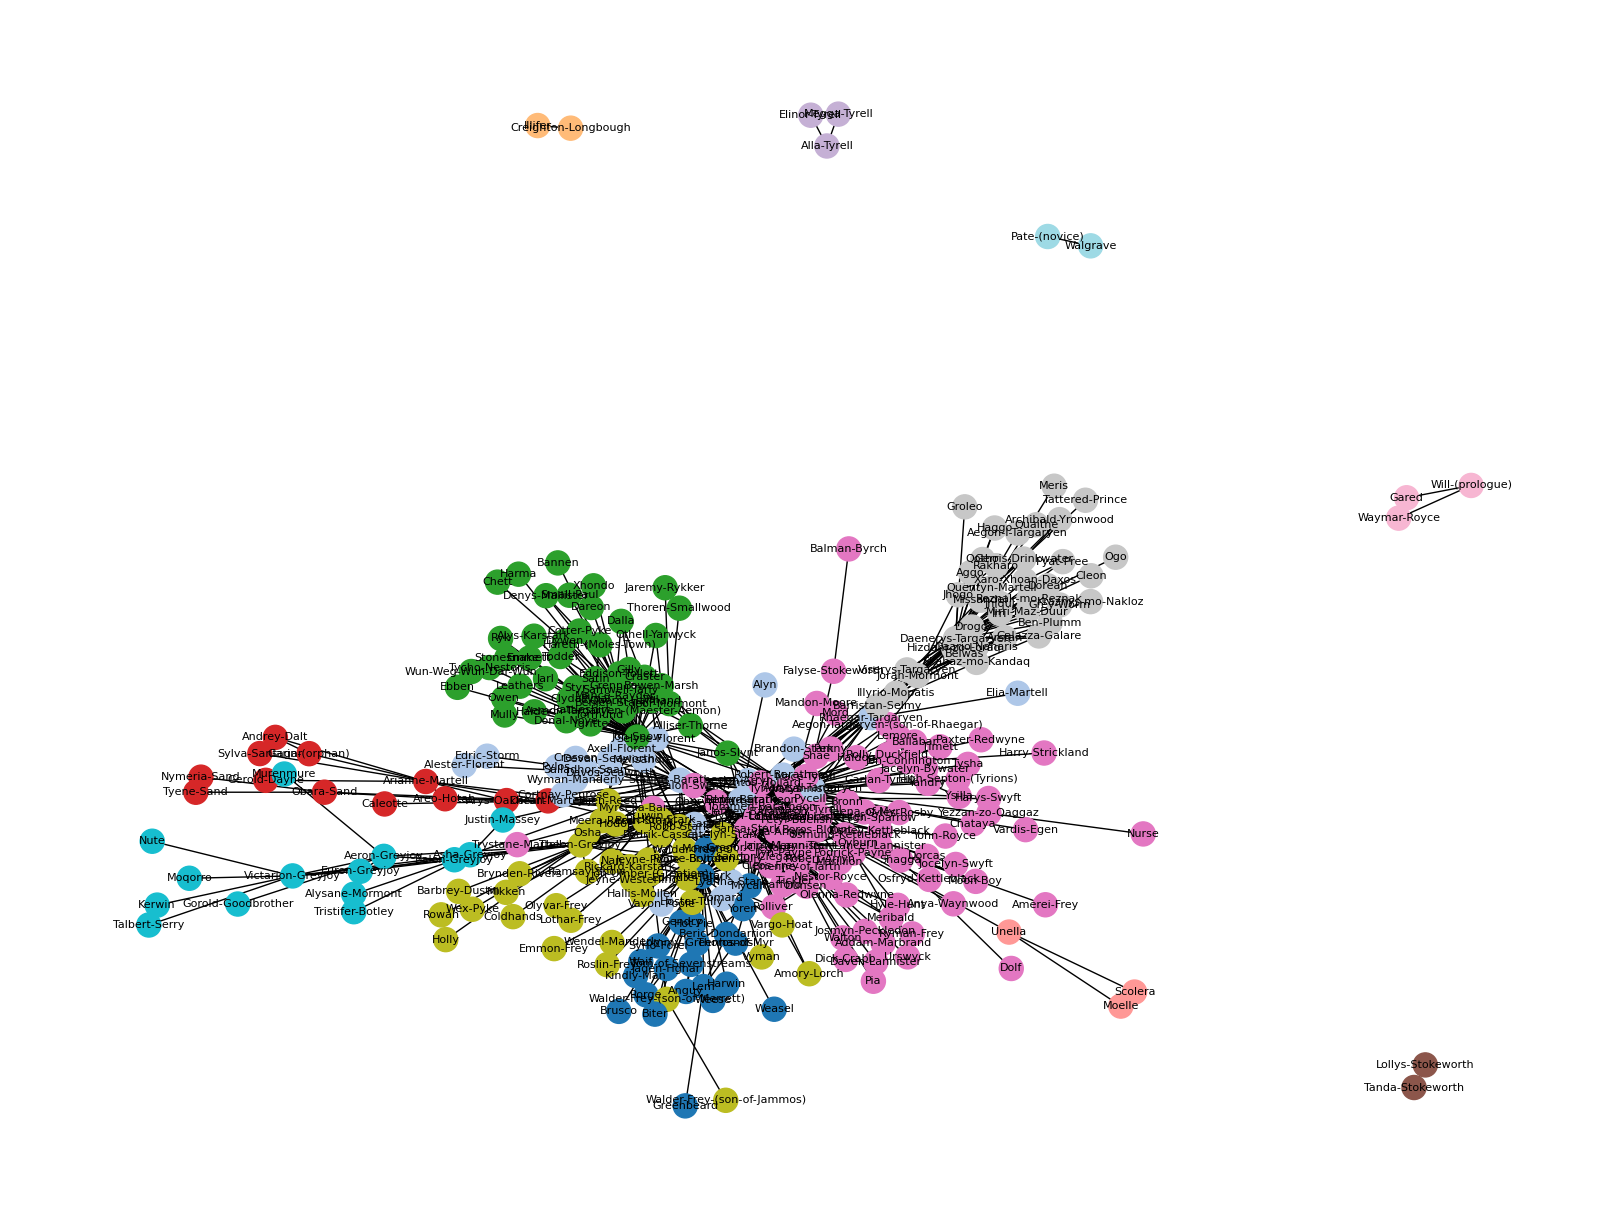

In [133]:
drawCommunities(filtered_G ,communities_generator_allbooks, 1.4 , 295)

## Analysis

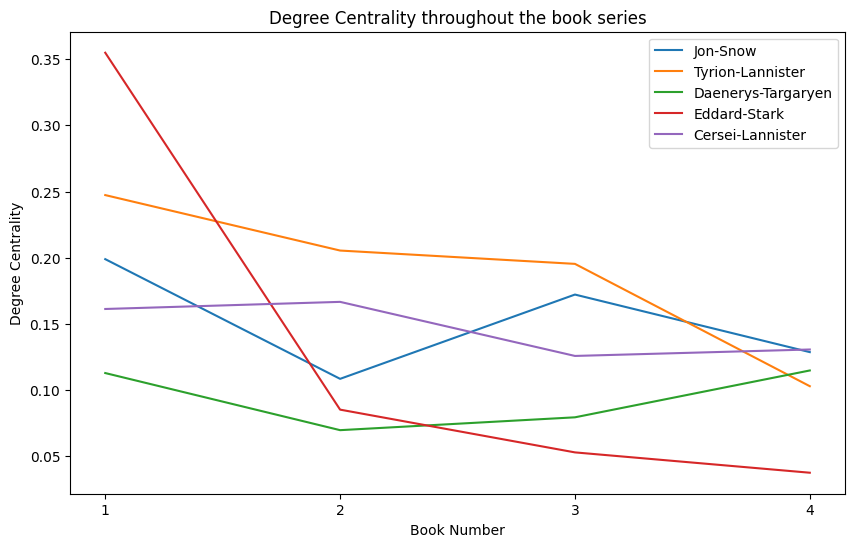

In [ ]:
plotCompareByCharacter(DegreeCentralitydict_MainCharacter,"Degree Centrality throughout the book series", "Degree Centrality")

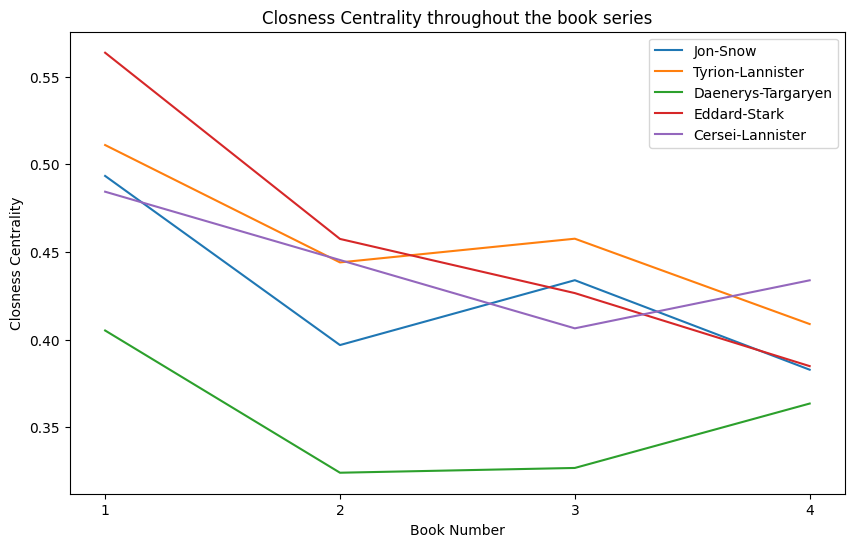

In [ ]:
plotCompareByCharacter(ClosnessCentralitydict_MainCharacter,"Closness Centrality throughout the book series", "Closness Centrality")

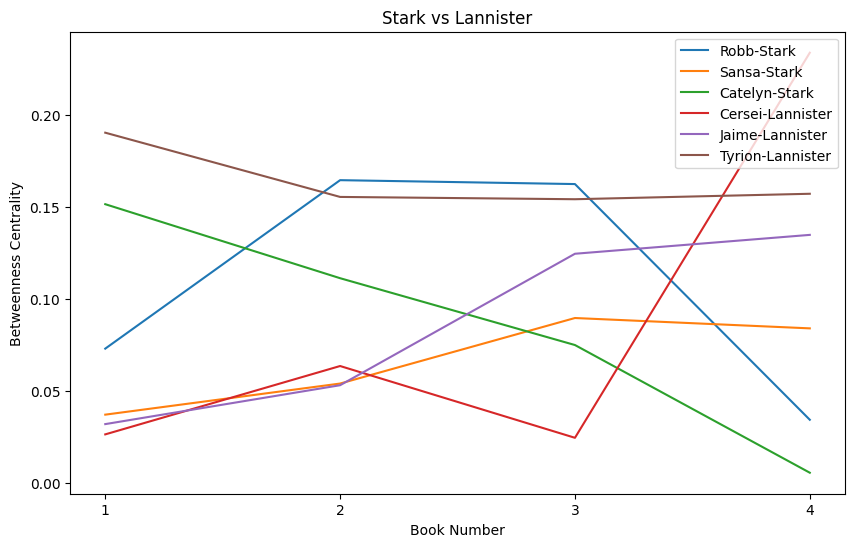

In [ ]:
plotCompareByCharacter(BetweennessCentralitydict_StarkVSLannister ,"Stark vs Lannister", "Betweenness Centrality")

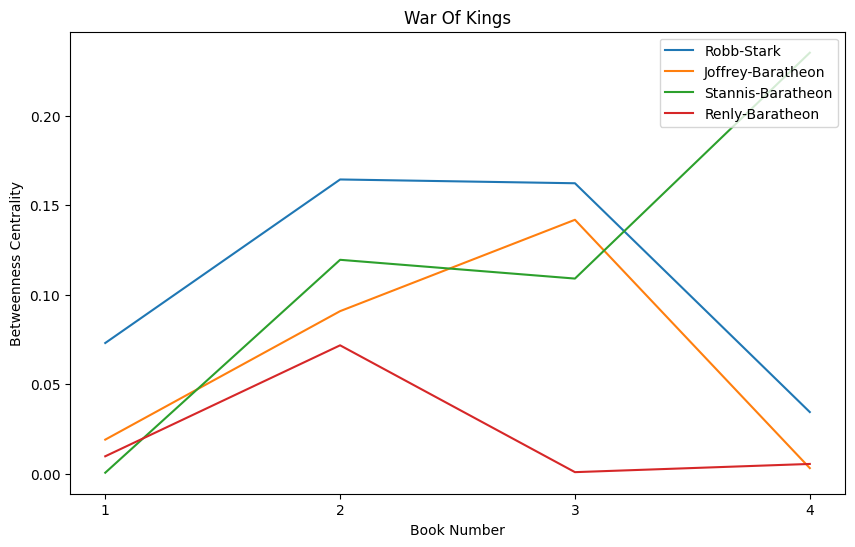

In [122]:
plotCompareByCharacter(BetweennessCentralitydict_WarOfKings ,"War Of Kings", "Betweenness Centrality")

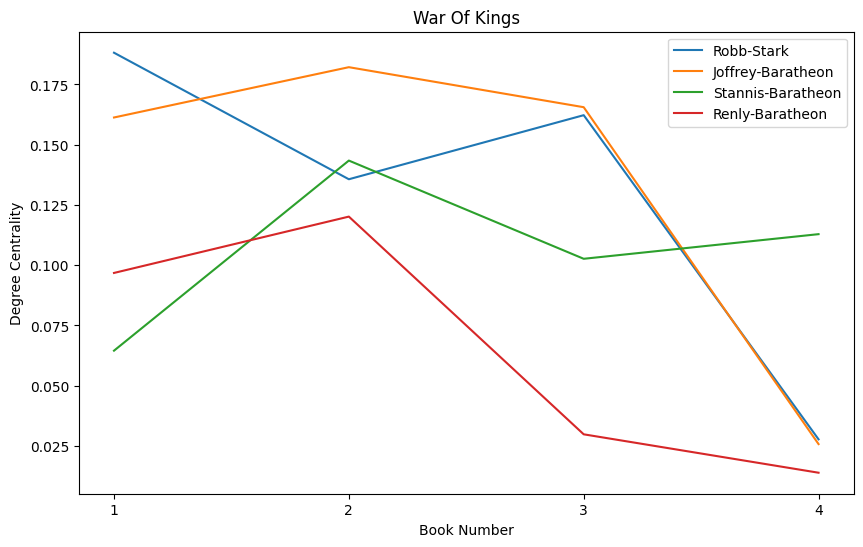

In [123]:
plotCompareByCharacter(DegreeCentralitydict_WarOfKings ,"War Of Kings", "Degree Centrality")

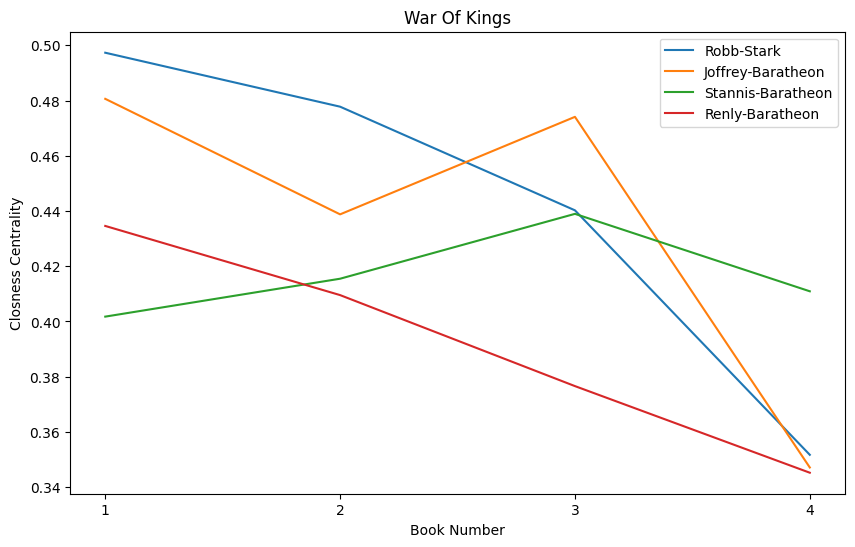

In [ ]:
plotCompareByCharacter(ClosnessCentralitydict_WarOfKings ,"War Of Kings", "Closness Centrality")

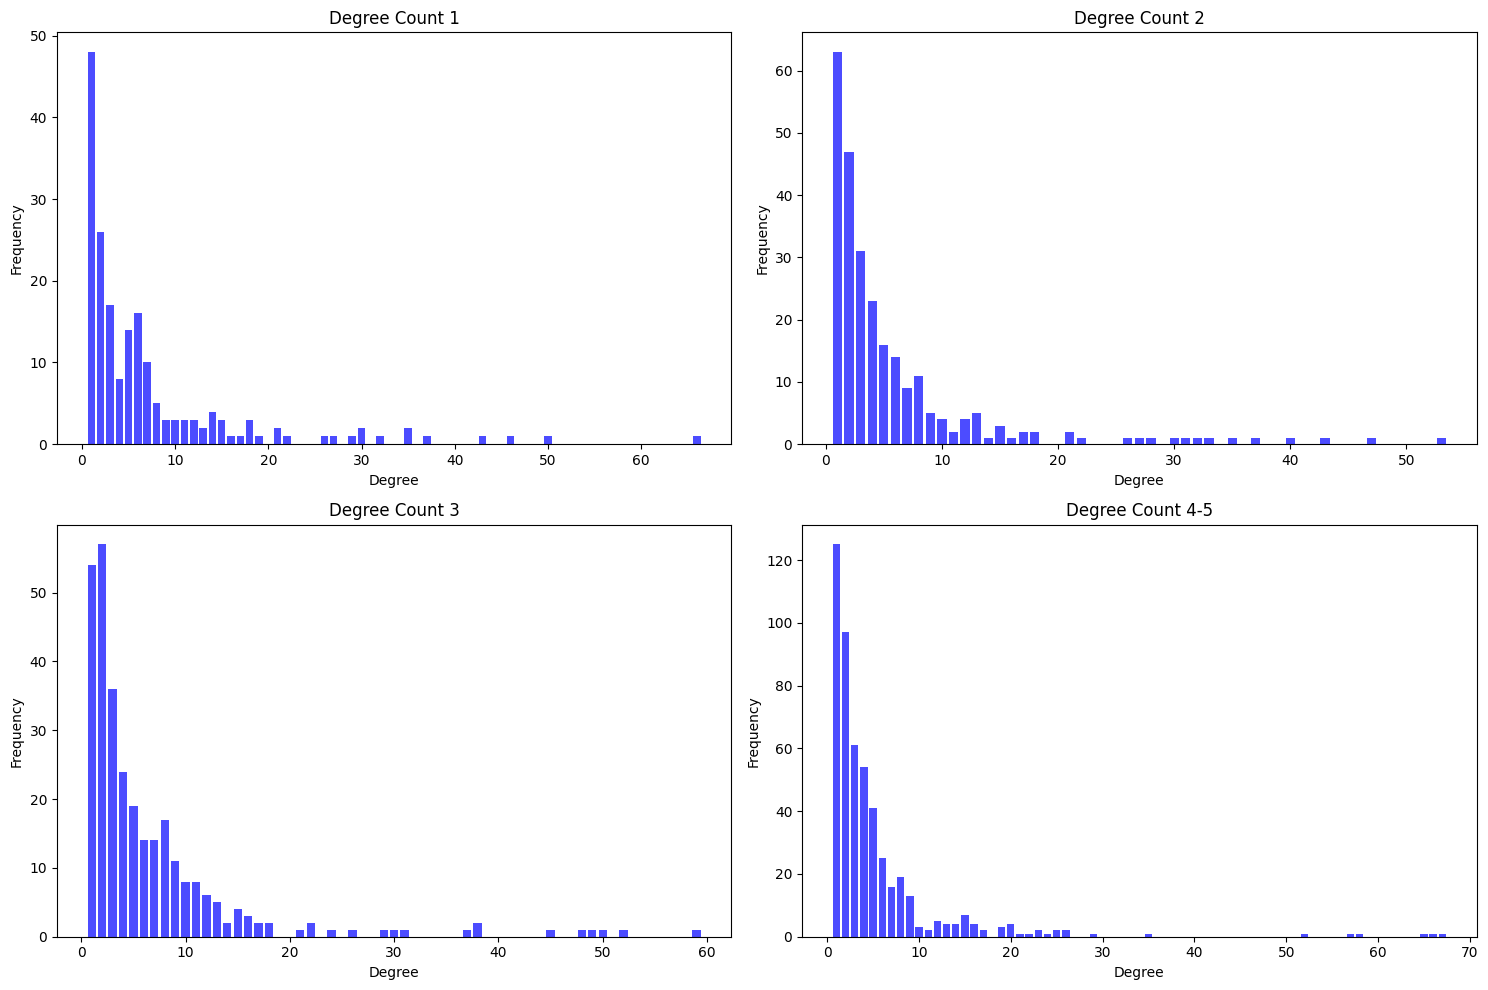

In [58]:

degree_counts = {
    # 'Degree Count All': degreeCountAll,
    'Degree Count 1': degreeCount1,
    'Degree Count 2': degreeCount2,
    'Degree Count 3': degreeCount3,
    'Degree Count 4-5': degreeCount45
}


plot_degree_histograms(degree_counts)